## <center>Analiza poziomu PM2.5 w afrykańskich miastach</center>
### Zespół:
<ol>
    <li style='font-size: 20px'>Hubert Kłosowski 242424</li>
    <li style='font-size: 20px'>Krzysztof Kolanek 242425</li>
    <li style='font-size: 20px'>Kamil Małecki 242464</li>
</ol>

### Potrzebne importy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Wczytanie danych

In [2]:
data = pd.read_csv('data\\Train.csv')
test = pd.read_csv('data\\Test.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8071 entries, 0 to 8070
Data columns (total 80 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   id                                                        8071 non-null   object 
 1   site_id                                                   8071 non-null   object 
 2   site_latitude                                             8071 non-null   float64
 3   site_longitude                                            8071 non-null   float64
 4   city                                                      8071 non-null   object 
 5   country                                                   8071 non-null   object 
 6   date                                                      8071 non-null   object 
 7   hour                                                      8071 non-null   int64  
 8   sulphurdioxide_so2

In [3]:
data.head()

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,id_vjcx08sz91,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-10-25,13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,id_bkg215syli,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-02,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,id_oui2pot3qd,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-03,13,NaN,NaN,...,6791.682888,51171.802486,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741
3,id_9aandqzy4n,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-08,14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.537600
4,id_ali5x2m4iw,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-09,13,0.000267,0.774656,...,1451.050659,96215.906250,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731


### Rozbicie daty na składowe

In [4]:
def change_date(dataframe):
    dataframe['date'] = pd.to_datetime(dataframe['date'])
    dataframe['day'] = dataframe['date'].dt.dayofweek.astype(np.int64)
    dataframe['month'] = dataframe['month'].astype(np.int64)
    return dataframe


data, test = change_date(data), change_date(test)

### Wykres przedstawiający jakość powietrza w krajach afrykańskich

Text(0.5, 1.0, 'Jakość powietrza z podziałem na kraje')

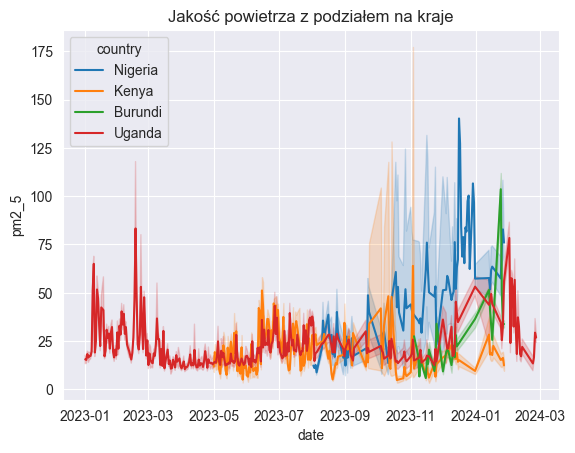

In [5]:
sns.lineplot(data=data, x='date', y='pm2_5', hue='country')
plt.title('Jakość powietrza z podziałem na kraje')

### Wykres przedstawiający wartość pm2_5 w zarejestrowanych godzinach

Text(0.5, 1.0, 'Jakość powietrza w poszczególnych godzinach z podziałem na kraje')

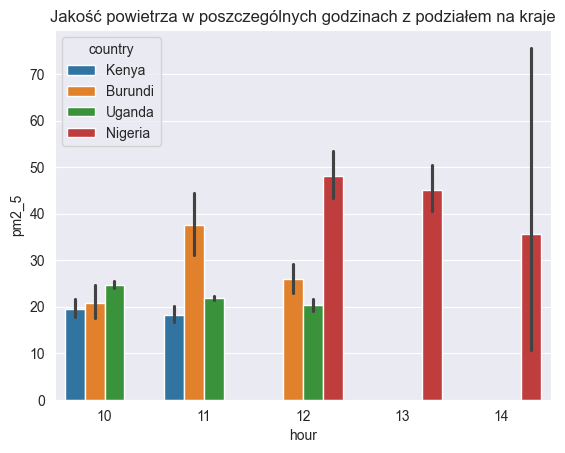

In [6]:
sns.barplot(data=data, x='hour', y='pm2_5', hue='country')
plt.title('Jakość powietrza w poszczególnych godzinach z podziałem na kraje')

### Wykres przedstawiający wartość pm2_5 z zależności od dnia tygodnia

Text(0.5, 1.0, 'Jakość powietrza w każdym dniu tygodnia z podziałem na kraje')

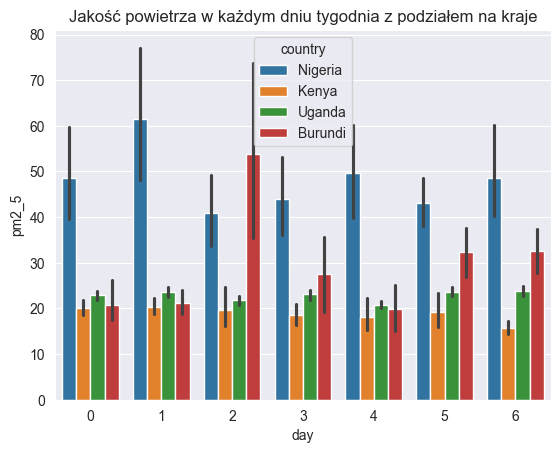

In [7]:
sns.barplot(data=data, x='day', y='pm2_5', hue='country')
plt.title('Jakość powietrza w każdym dniu tygodnia z podziałem na kraje')

### Wykres przedstawiający wartość pm2_5 z zależności od miesiąca

Text(0.5, 1.0, 'Jakość powietrza w każdym dniu tygodnia z podziałem na kraje')

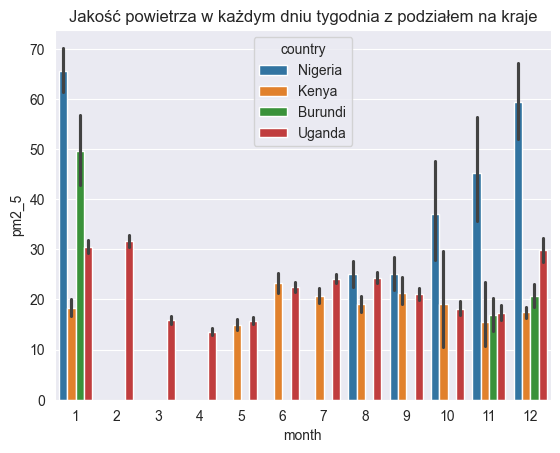

In [8]:
sns.barplot(data=data, x='month', y='pm2_5', hue='country')
plt.title('Jakość powietrza w każdym dniu tygodnia z podziałem na kraje')

### Korelacje poszczególnych grup kolumn

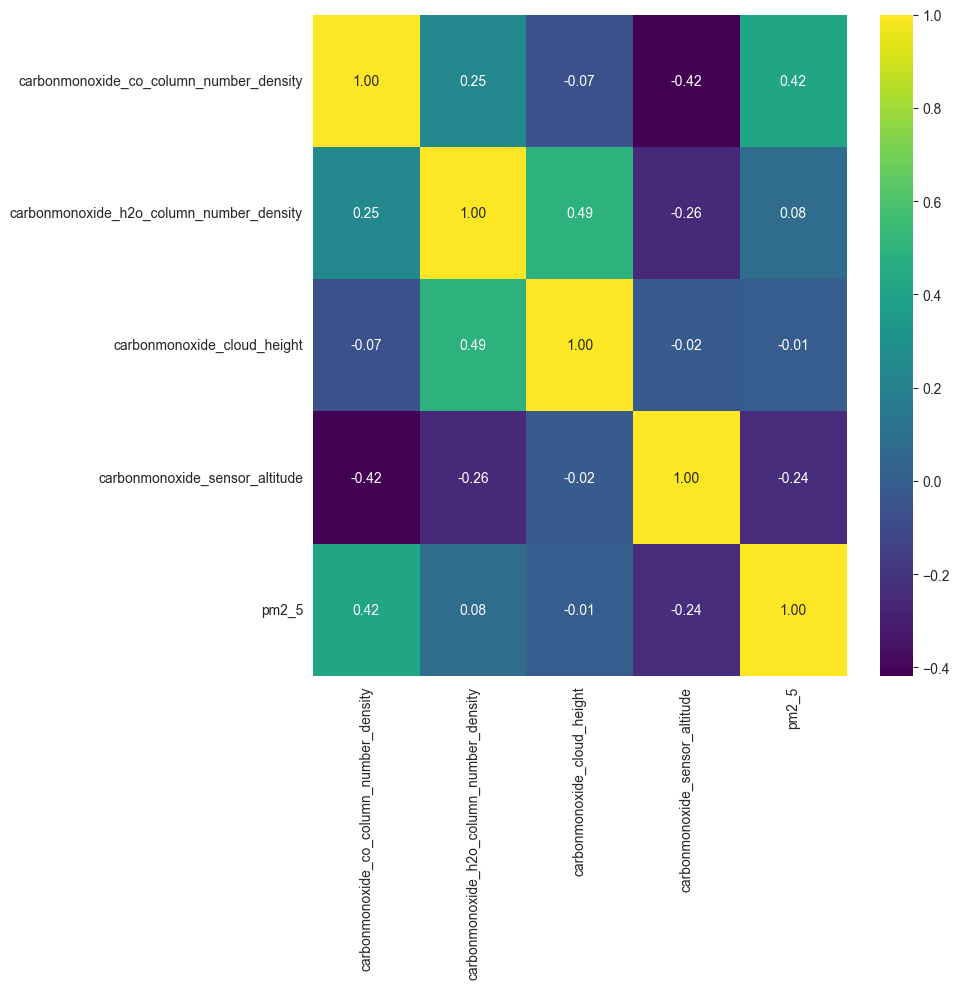

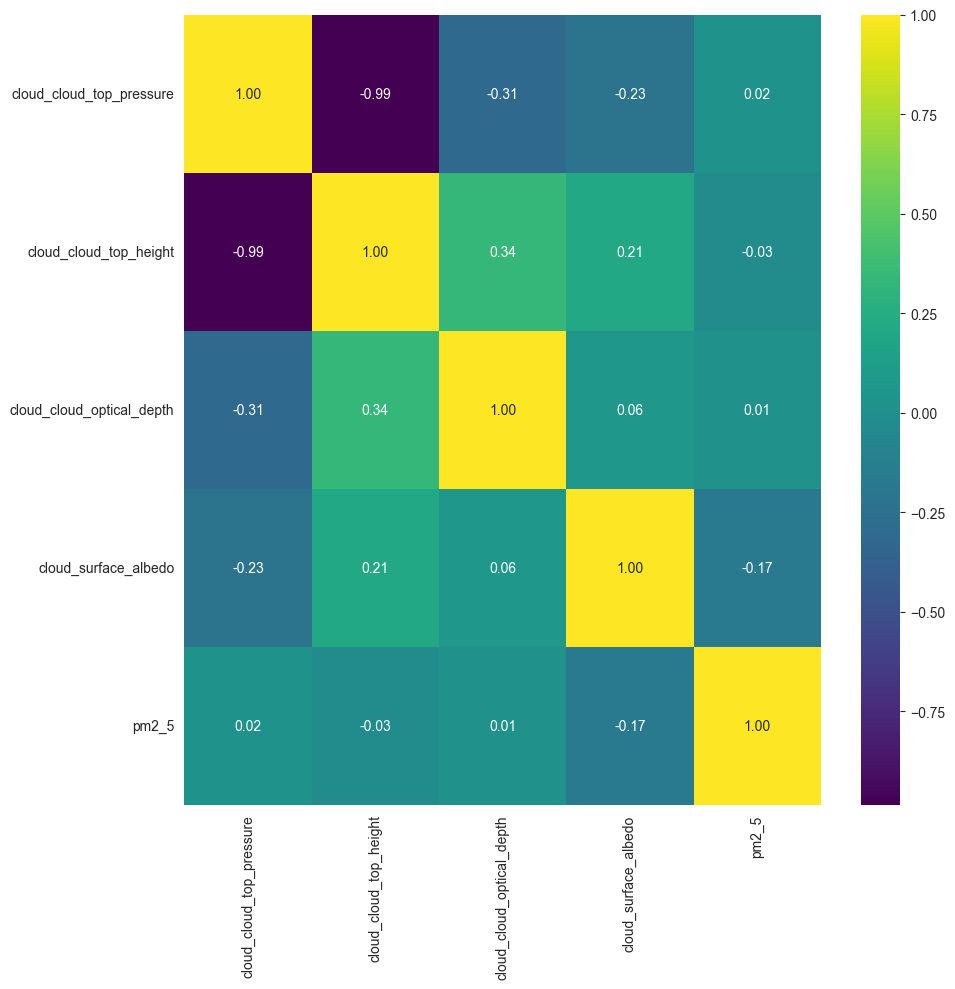

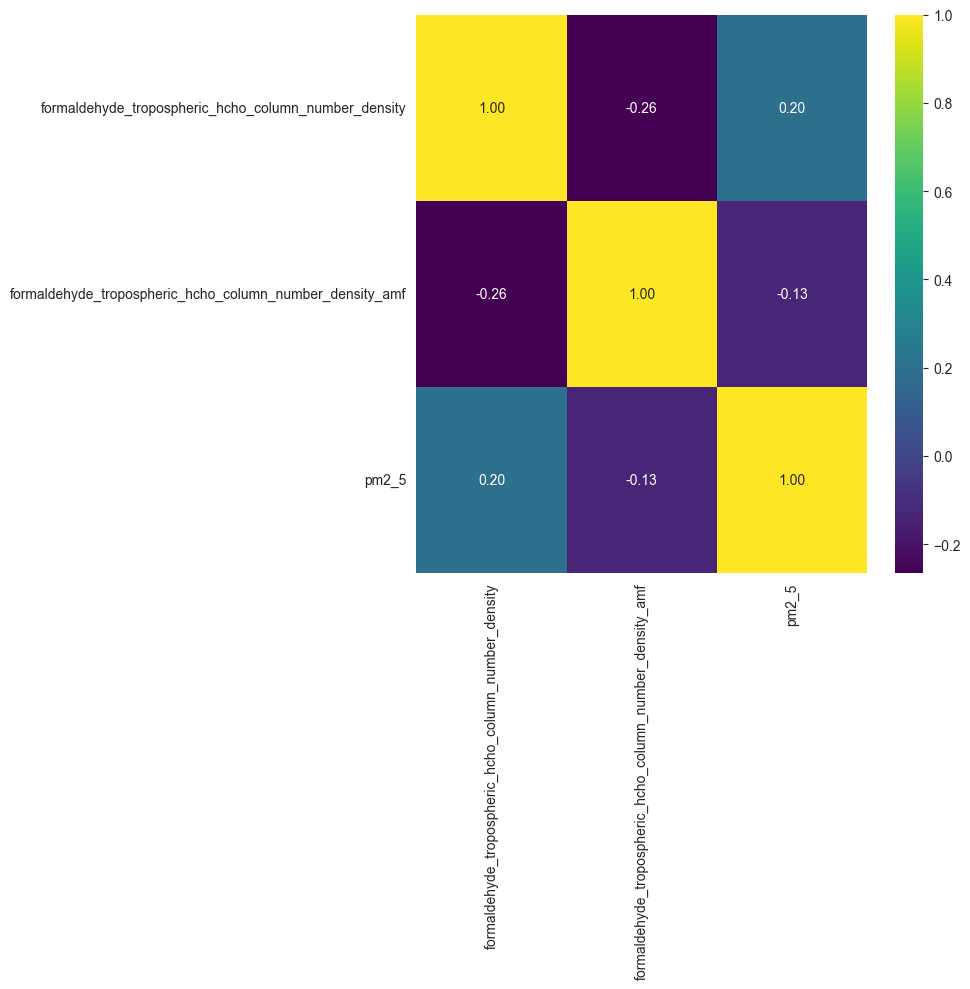

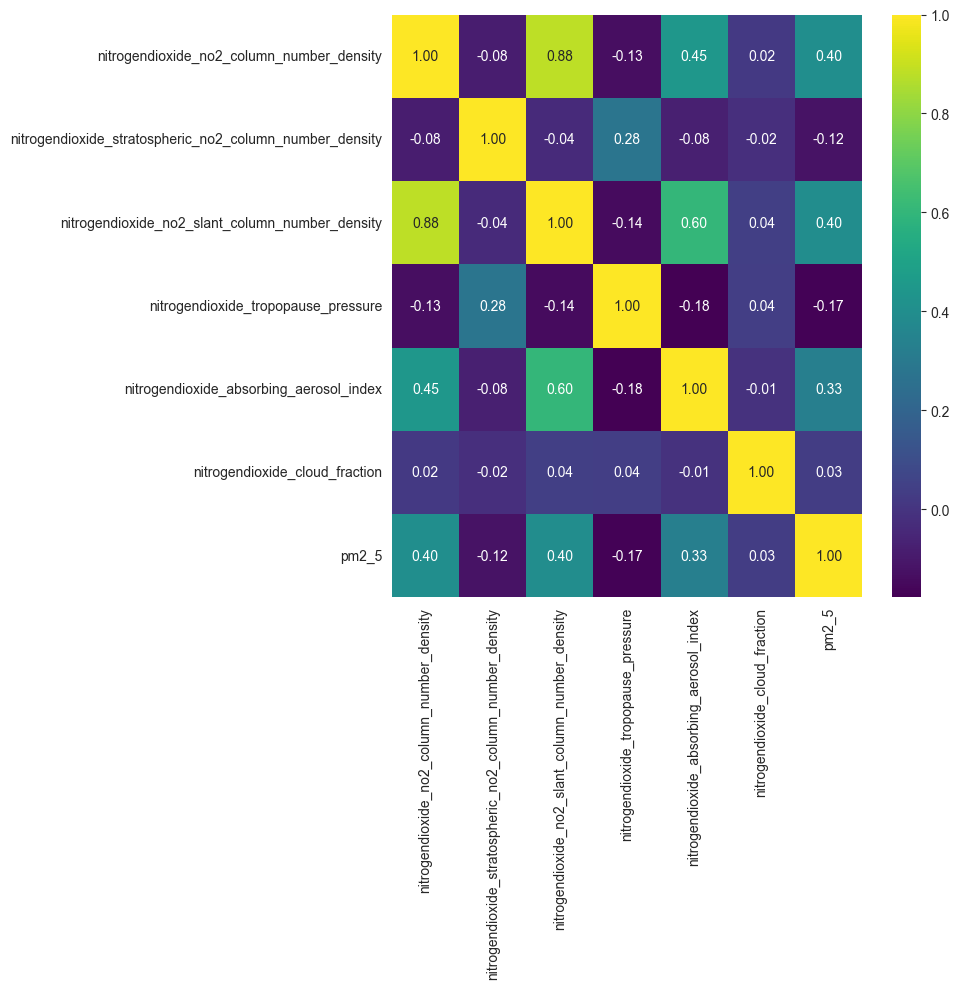

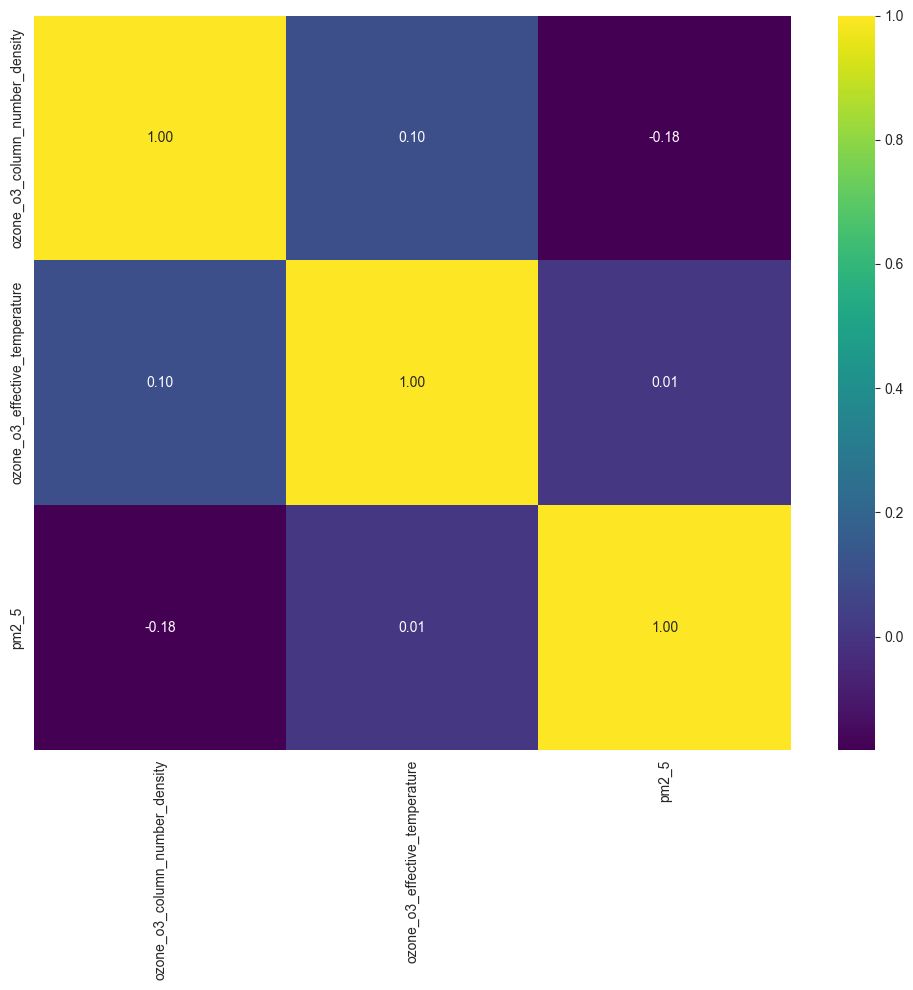

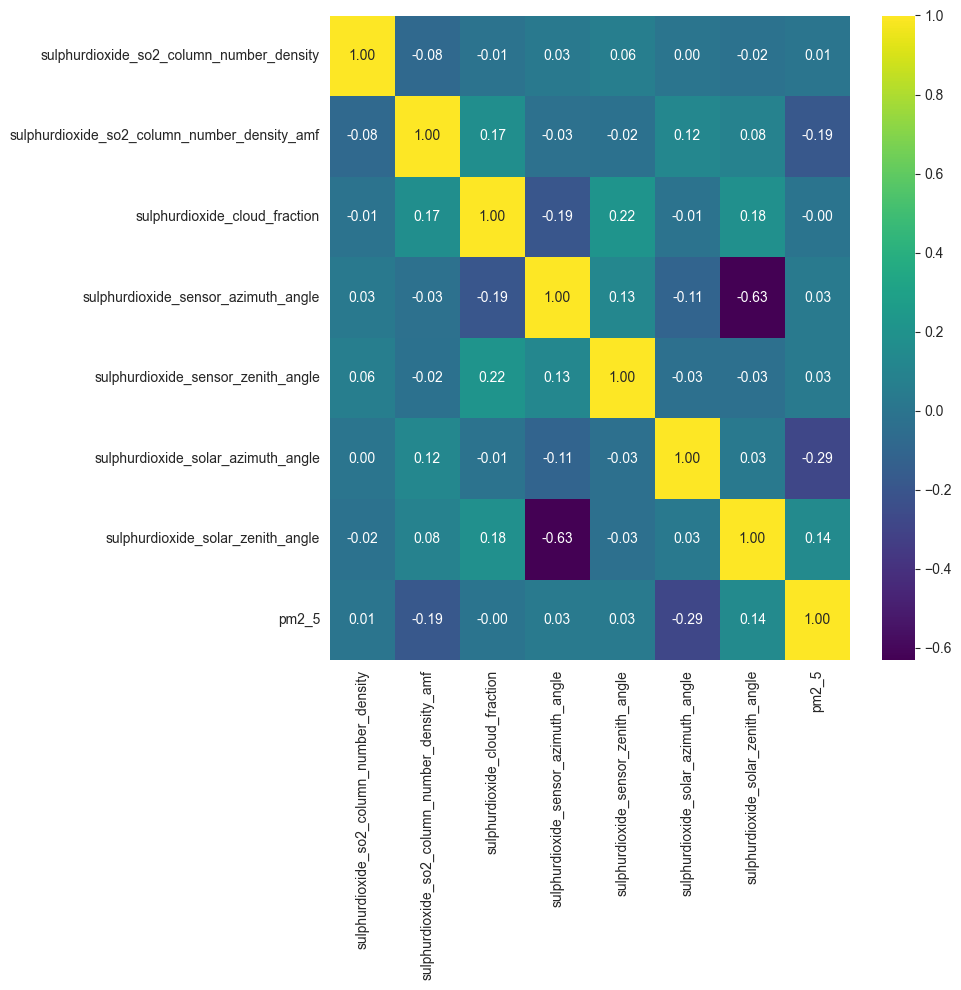

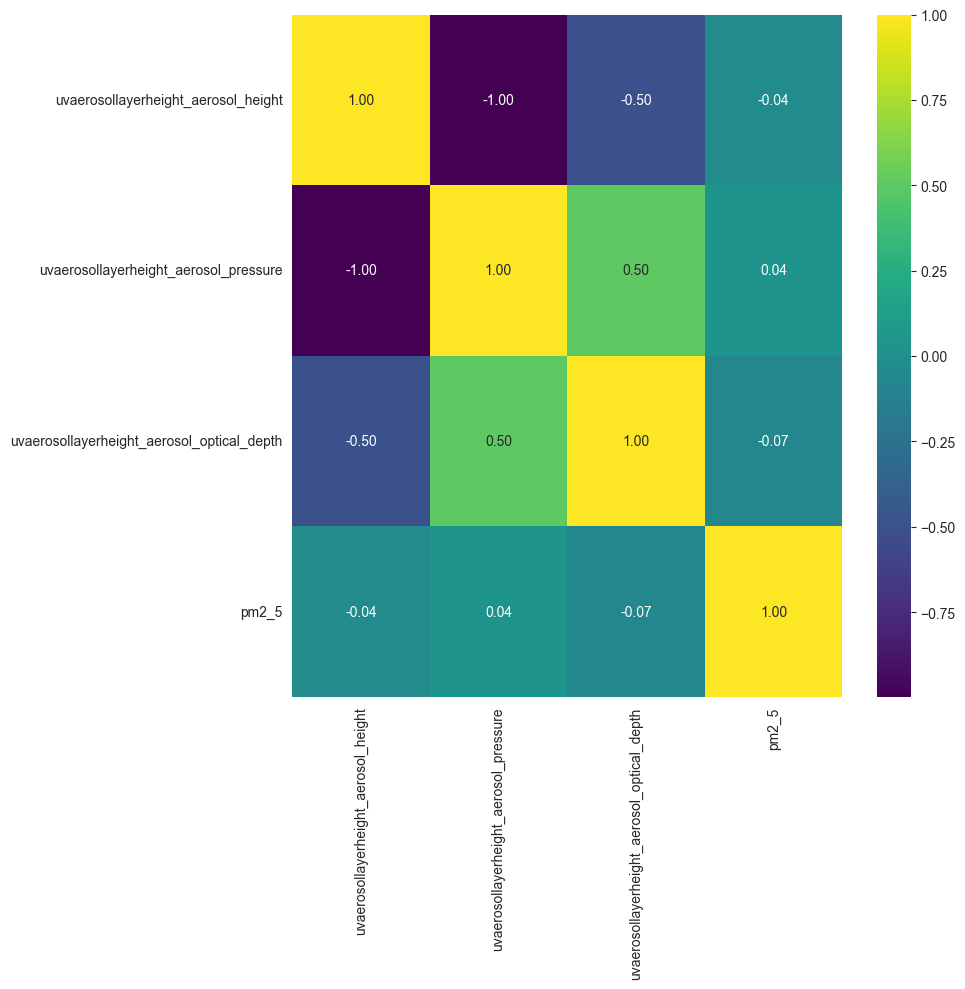

In [9]:
def correlation():
    for index, column in enumerate(starts_with):
        selected_columns = [col for col in data.columns if col.startswith(column) or col == 'pm2_5']
        if len(selected_columns) > 1:
            fig, ax = plt.subplots(figsize=(10, 10))
            sns.heatmap(data[selected_columns].corr(), annot=True, fmt='.2f', cmap='viridis', ax=ax)
            plt.tight_layout()
            plt.show()
        
def drop_high_corelated_columns(dataframe):
    matrix = dataframe.corr(numeric_only=True)
    upper = matrix.where(np.triu(np.ones(matrix.shape), k=1).astype(np.bool_))
    to_drop = [column for column in upper.columns if any(upper[column] >= 0.9)]
    return dataframe.drop(to_drop, axis=1)


final_ids = test['id']
starts_with = data.columns.str.split('_', expand=True).levels[0].to_frame()
starts_with.drop(['month', 'day', 'hour', 'pm2'], inplace=True)
starts_with = starts_with[0].tolist()
data, test = drop_high_corelated_columns(data), drop_high_corelated_columns(test)
data.drop(columns=['id', 'city', 'country', 'site_id', 'date', 'site_latitude', 'site_longitude'], inplace=True)
test.drop(columns=['id', 'city', 'country', 'site_id', 'date', 'site_latitude', 'site_longitude'], inplace=True)

correlation()

## <center>Czyszczenie danych</center>

### 1. Uzupełnienie wartości brakujących

In [10]:
from sklearn.impute import KNNImputer

def fill_based_on(dataframe, date_unit='day'):
    date_range = dataframe[date_unit].unique()
    for date in date_range:
        for i, column in enumerate(starts_with):
            similar_columns = [el for el in dataframe.columns if el.startswith(column)]
            df = dataframe.loc[dataframe[date_unit] == date, similar_columns]
            if not df.empty:
                dataframe.loc[dataframe[date_unit] == date, similar_columns] = imputers[i].fit_transform(df)
    return dataframe

def prepare_dataframe(dataframe):  # usuwamy kolumny o dużej liczbie wartości NaN
    to_drop = []
    for index, el in enumerate(dataframe.columns):
        if dataframe[el].isna().sum() / len(dataframe) >= 0.9:
            to_drop.append(el)
    dataframe.drop(to_drop, axis=1, inplace=True)
    return dataframe


imputers = [KNNImputer(n_neighbors=15, weights='distance') for _ in range(len(starts_with))]
data, test = prepare_dataframe(data), prepare_dataframe(test)
data, test = fill_based_on(data), fill_based_on(test)

### Wykresy pudełkowe wskazujące wartości odstające

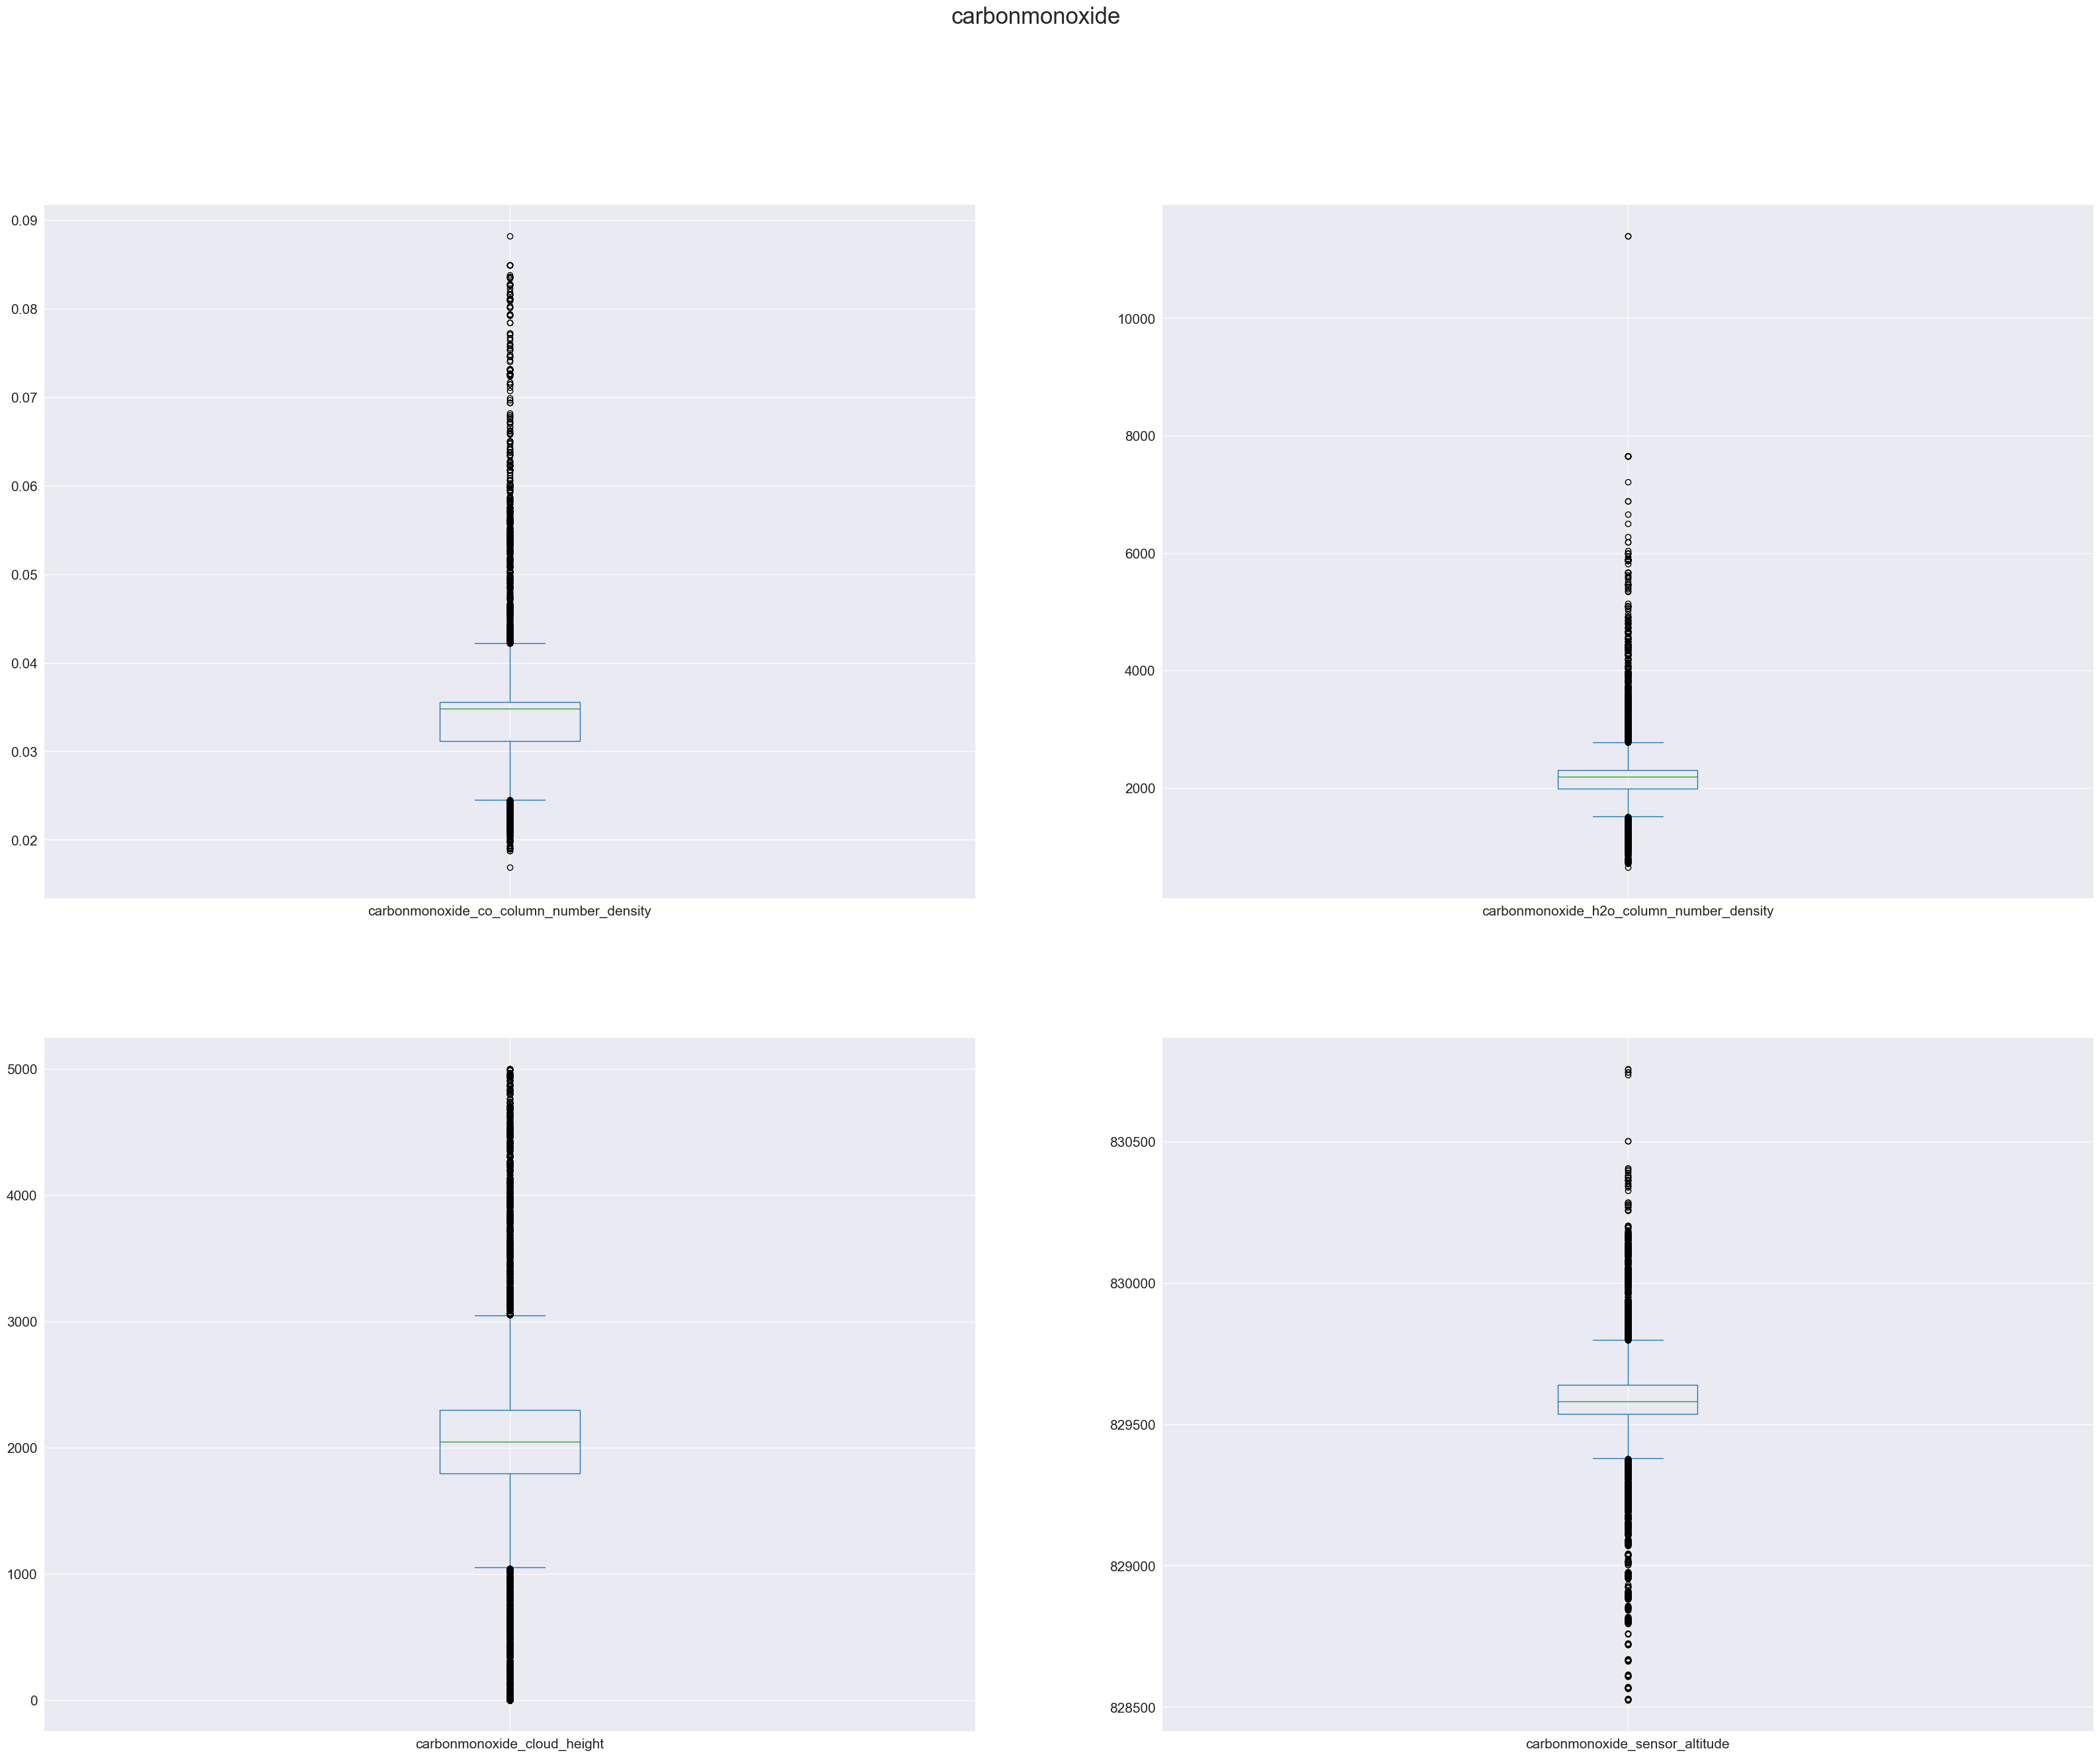

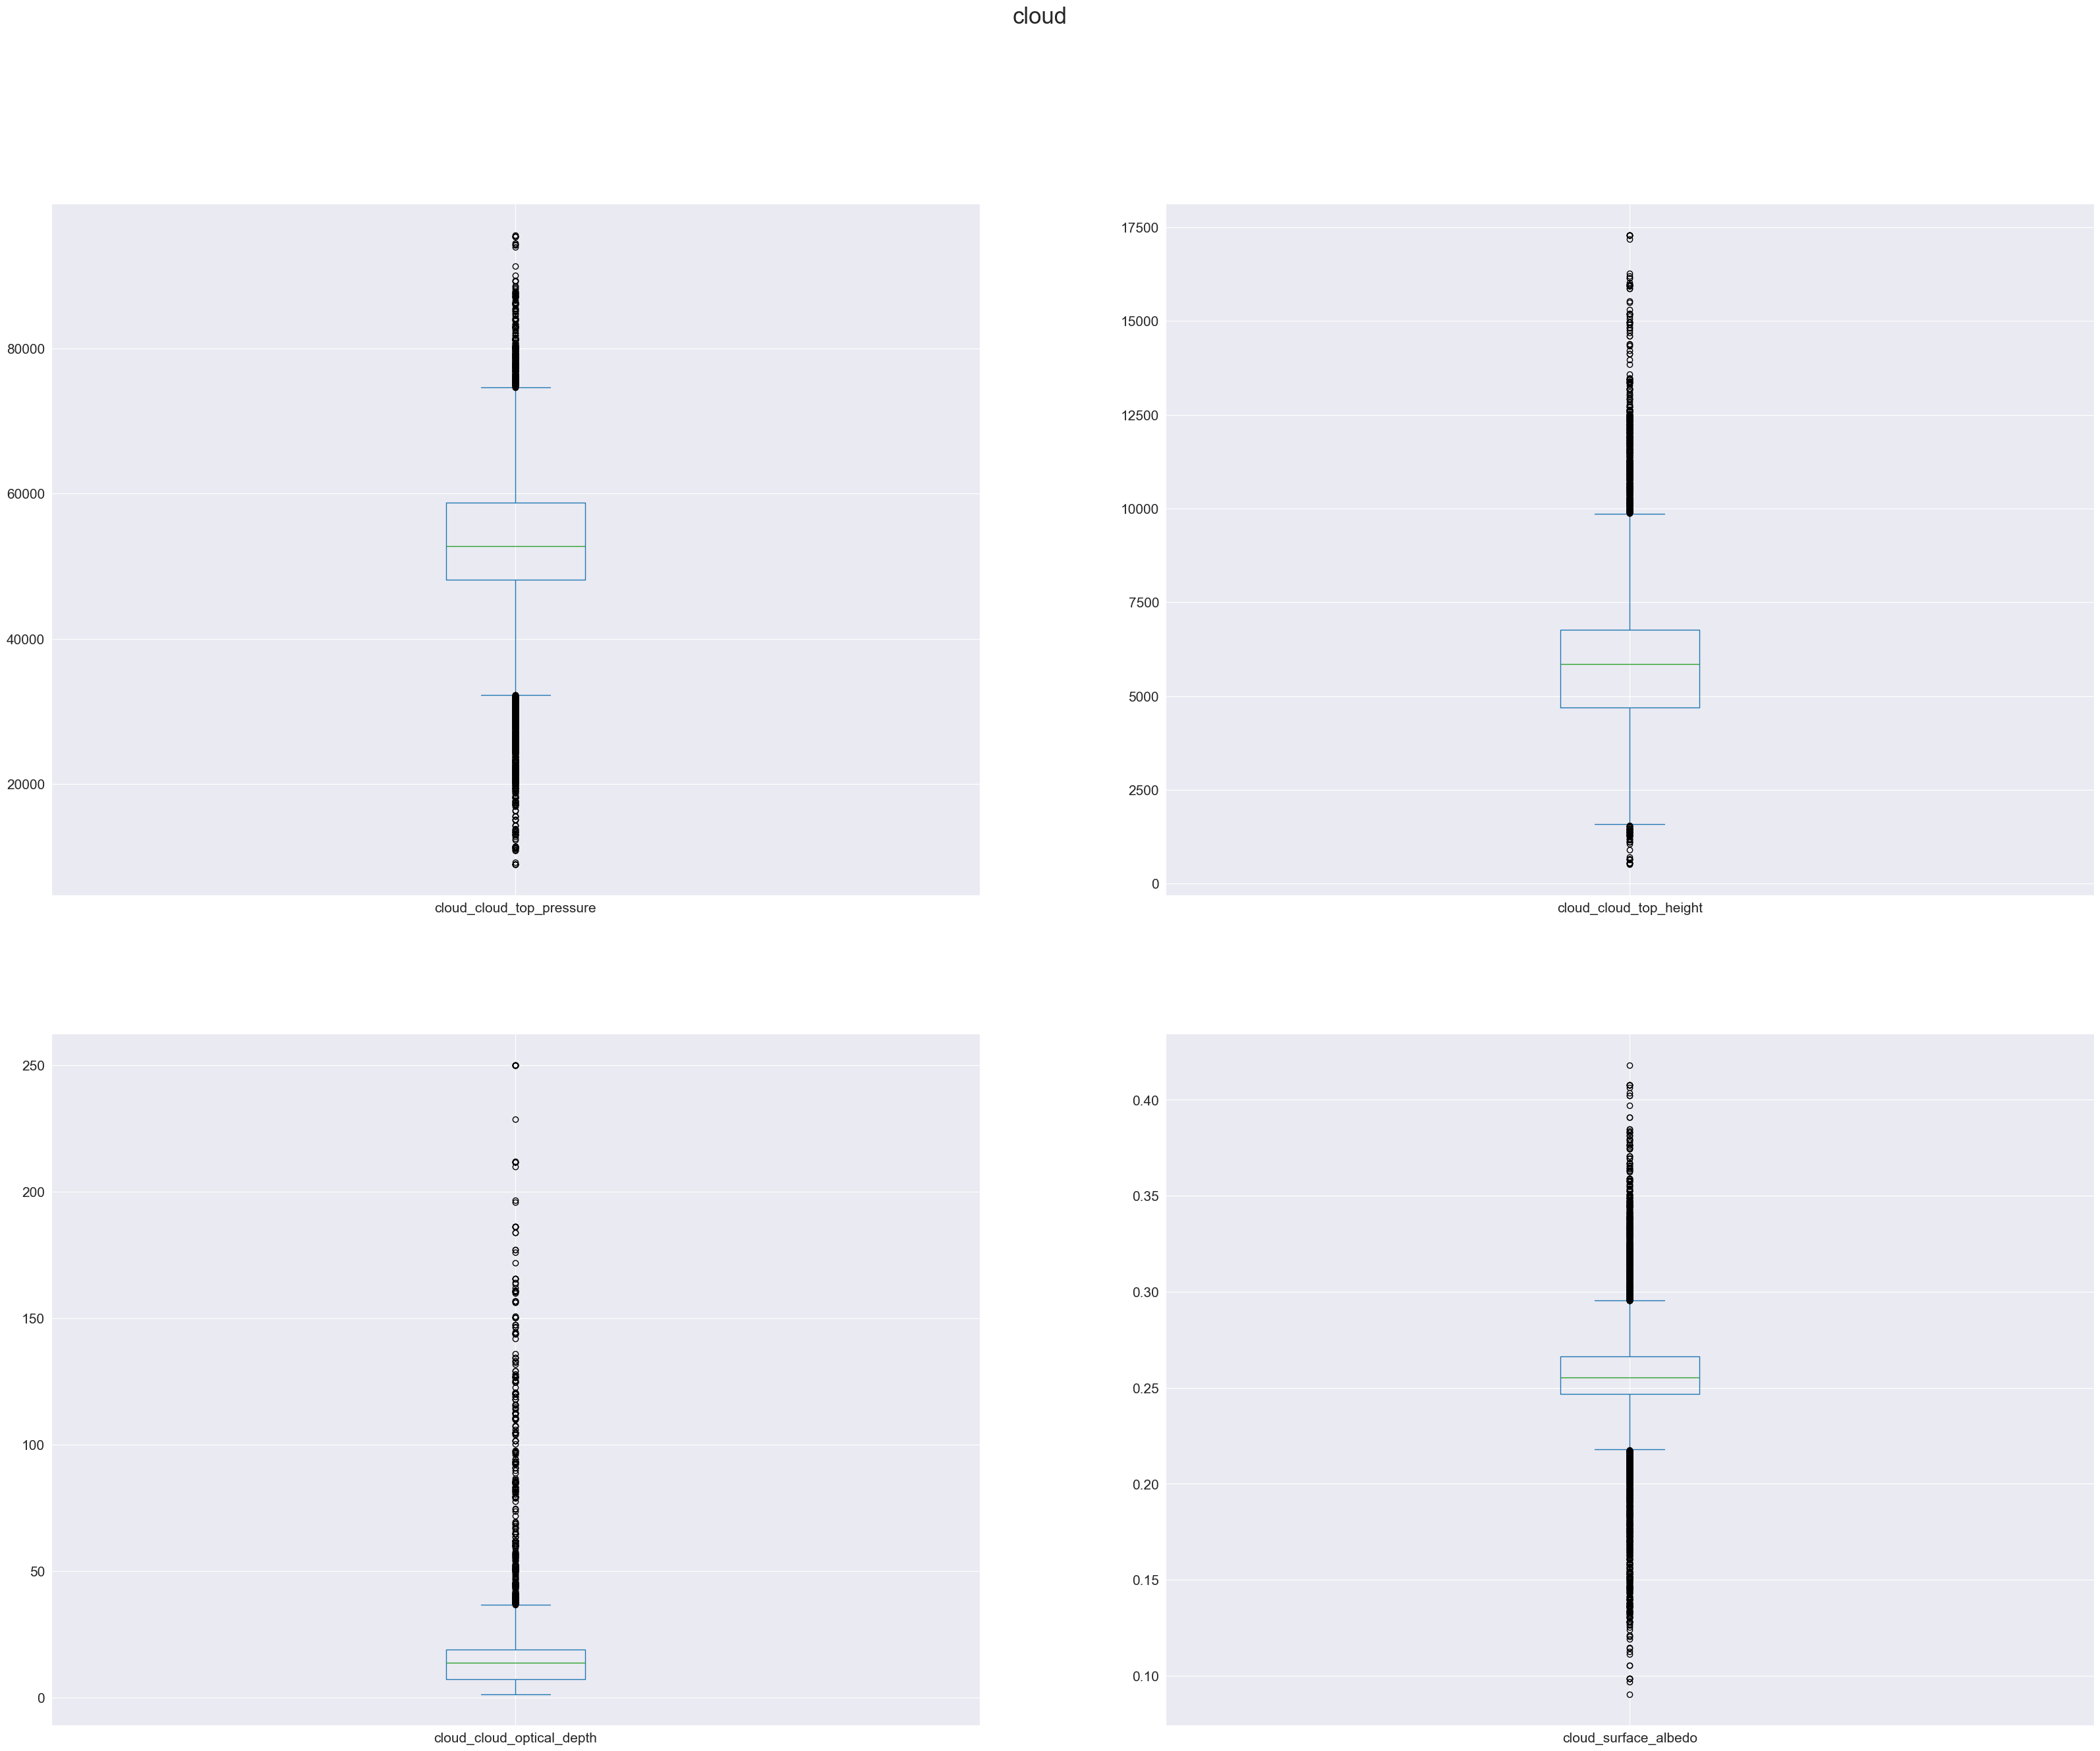

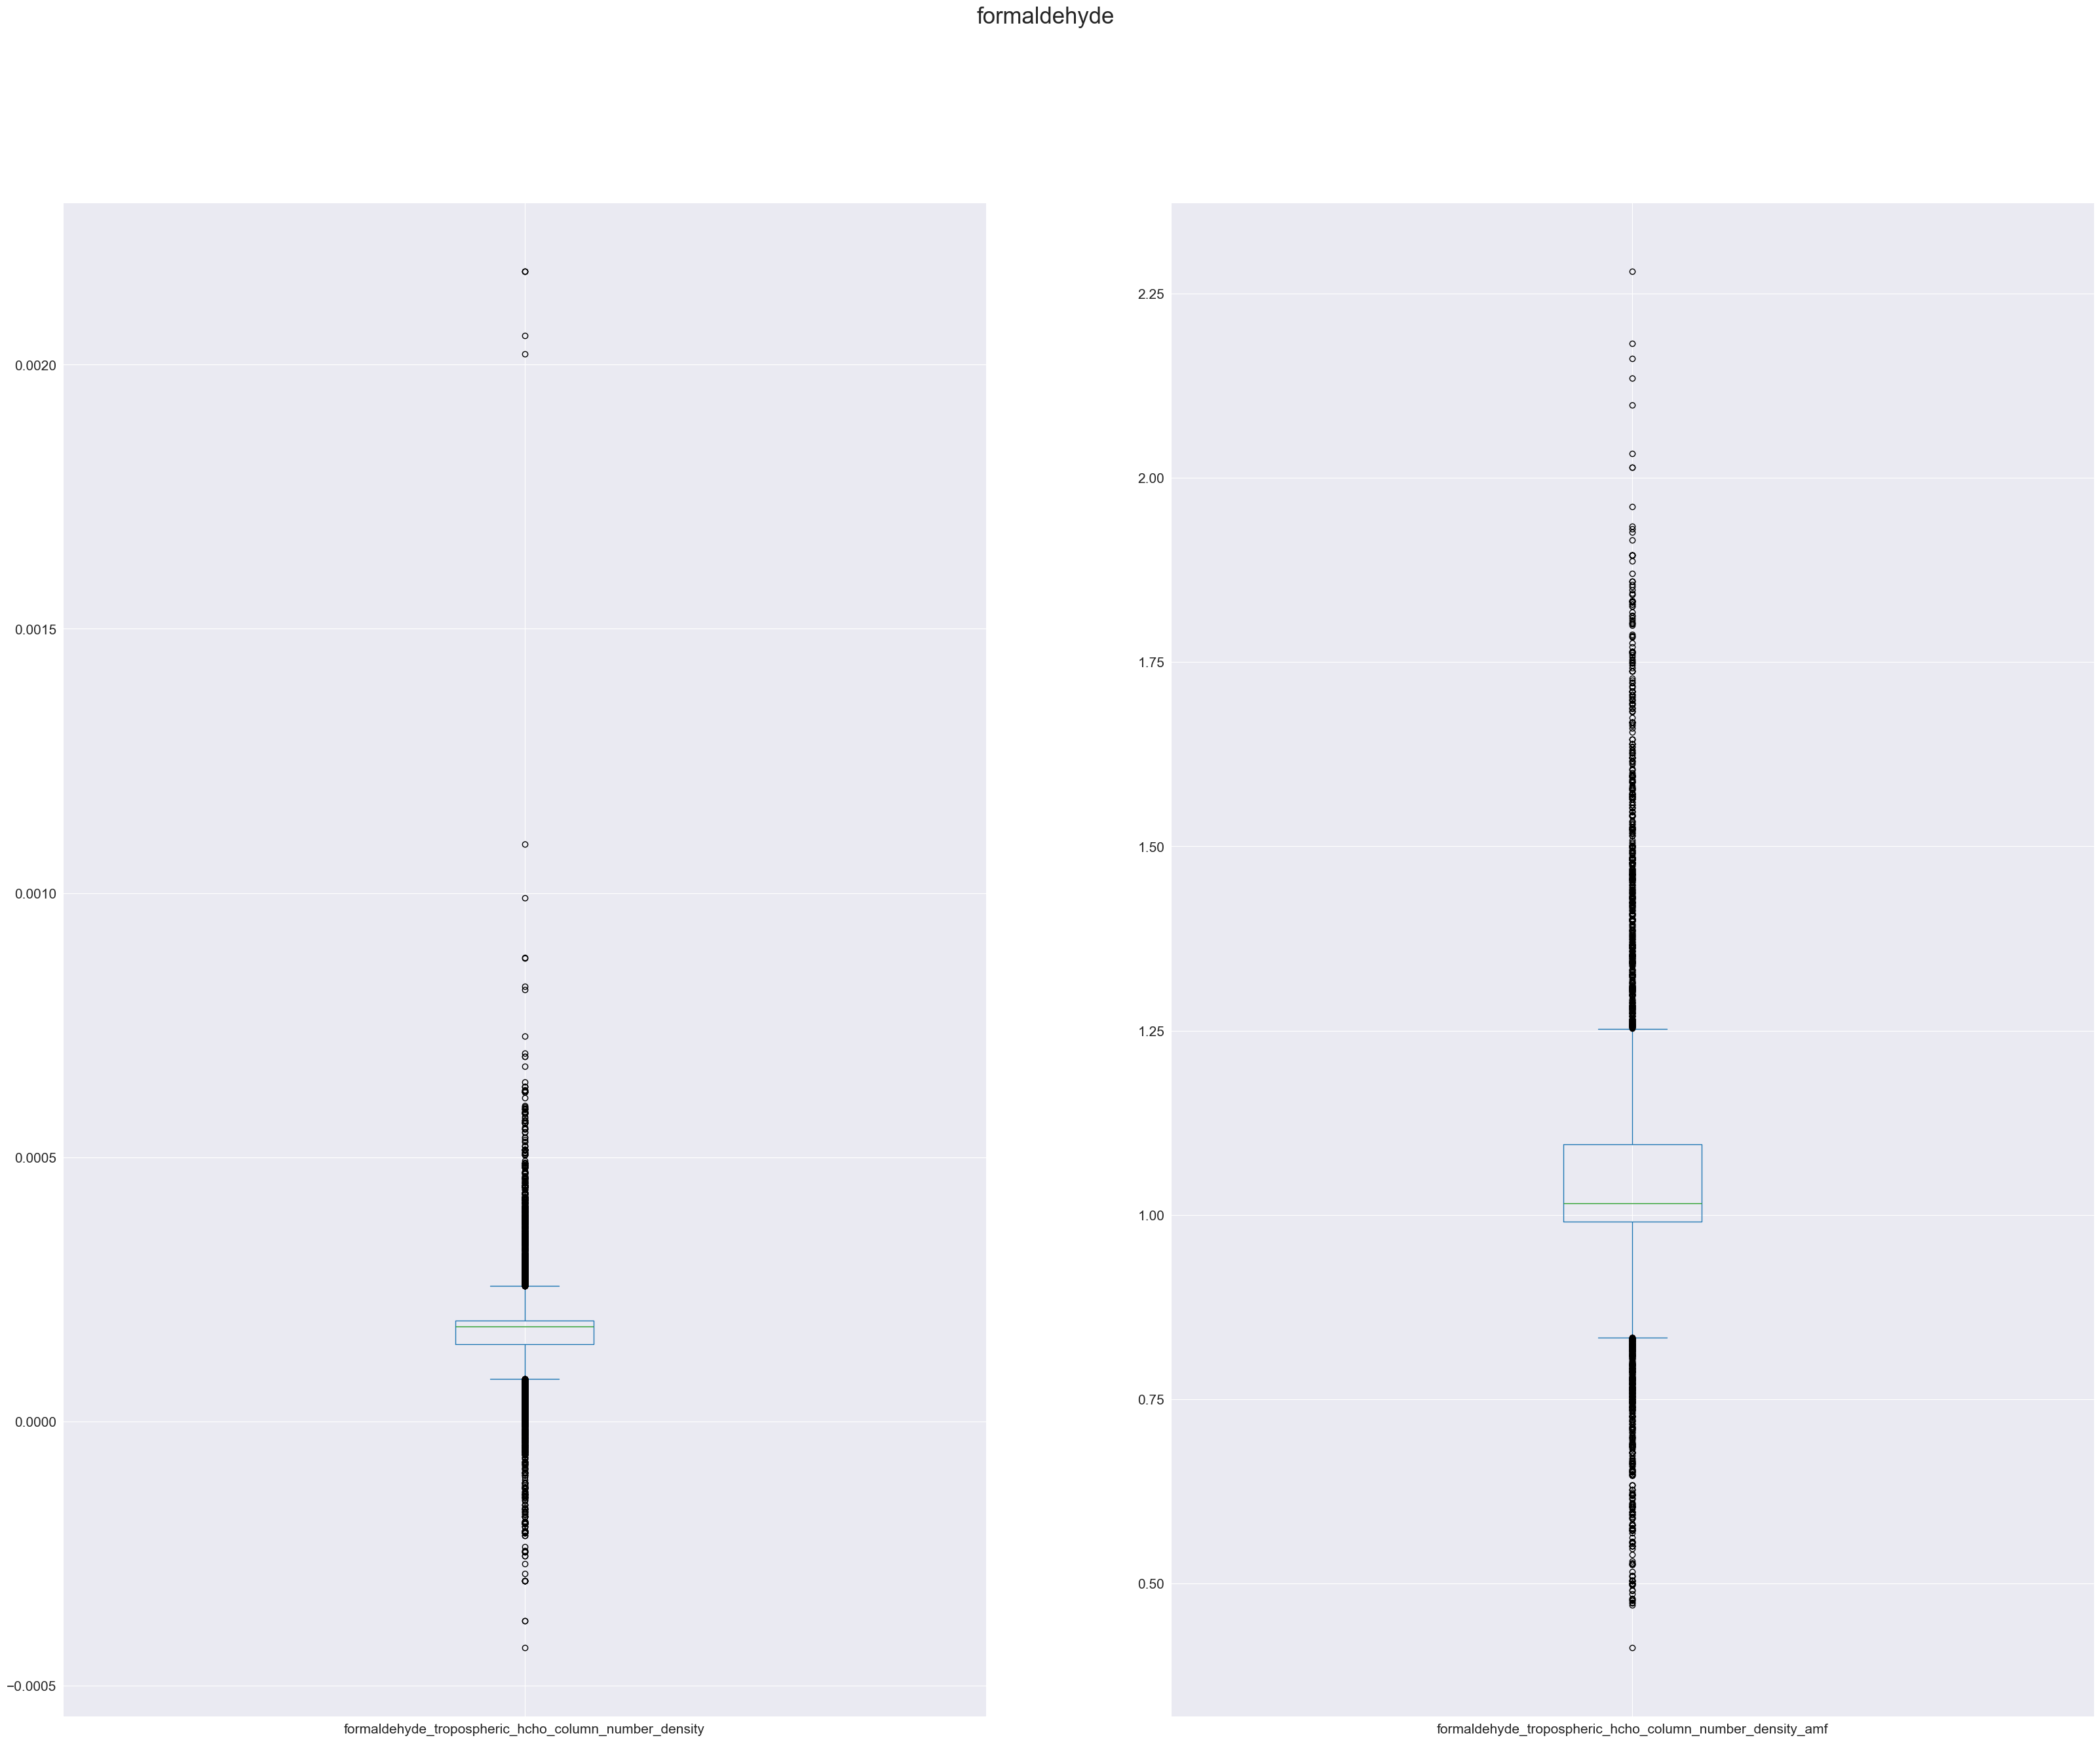

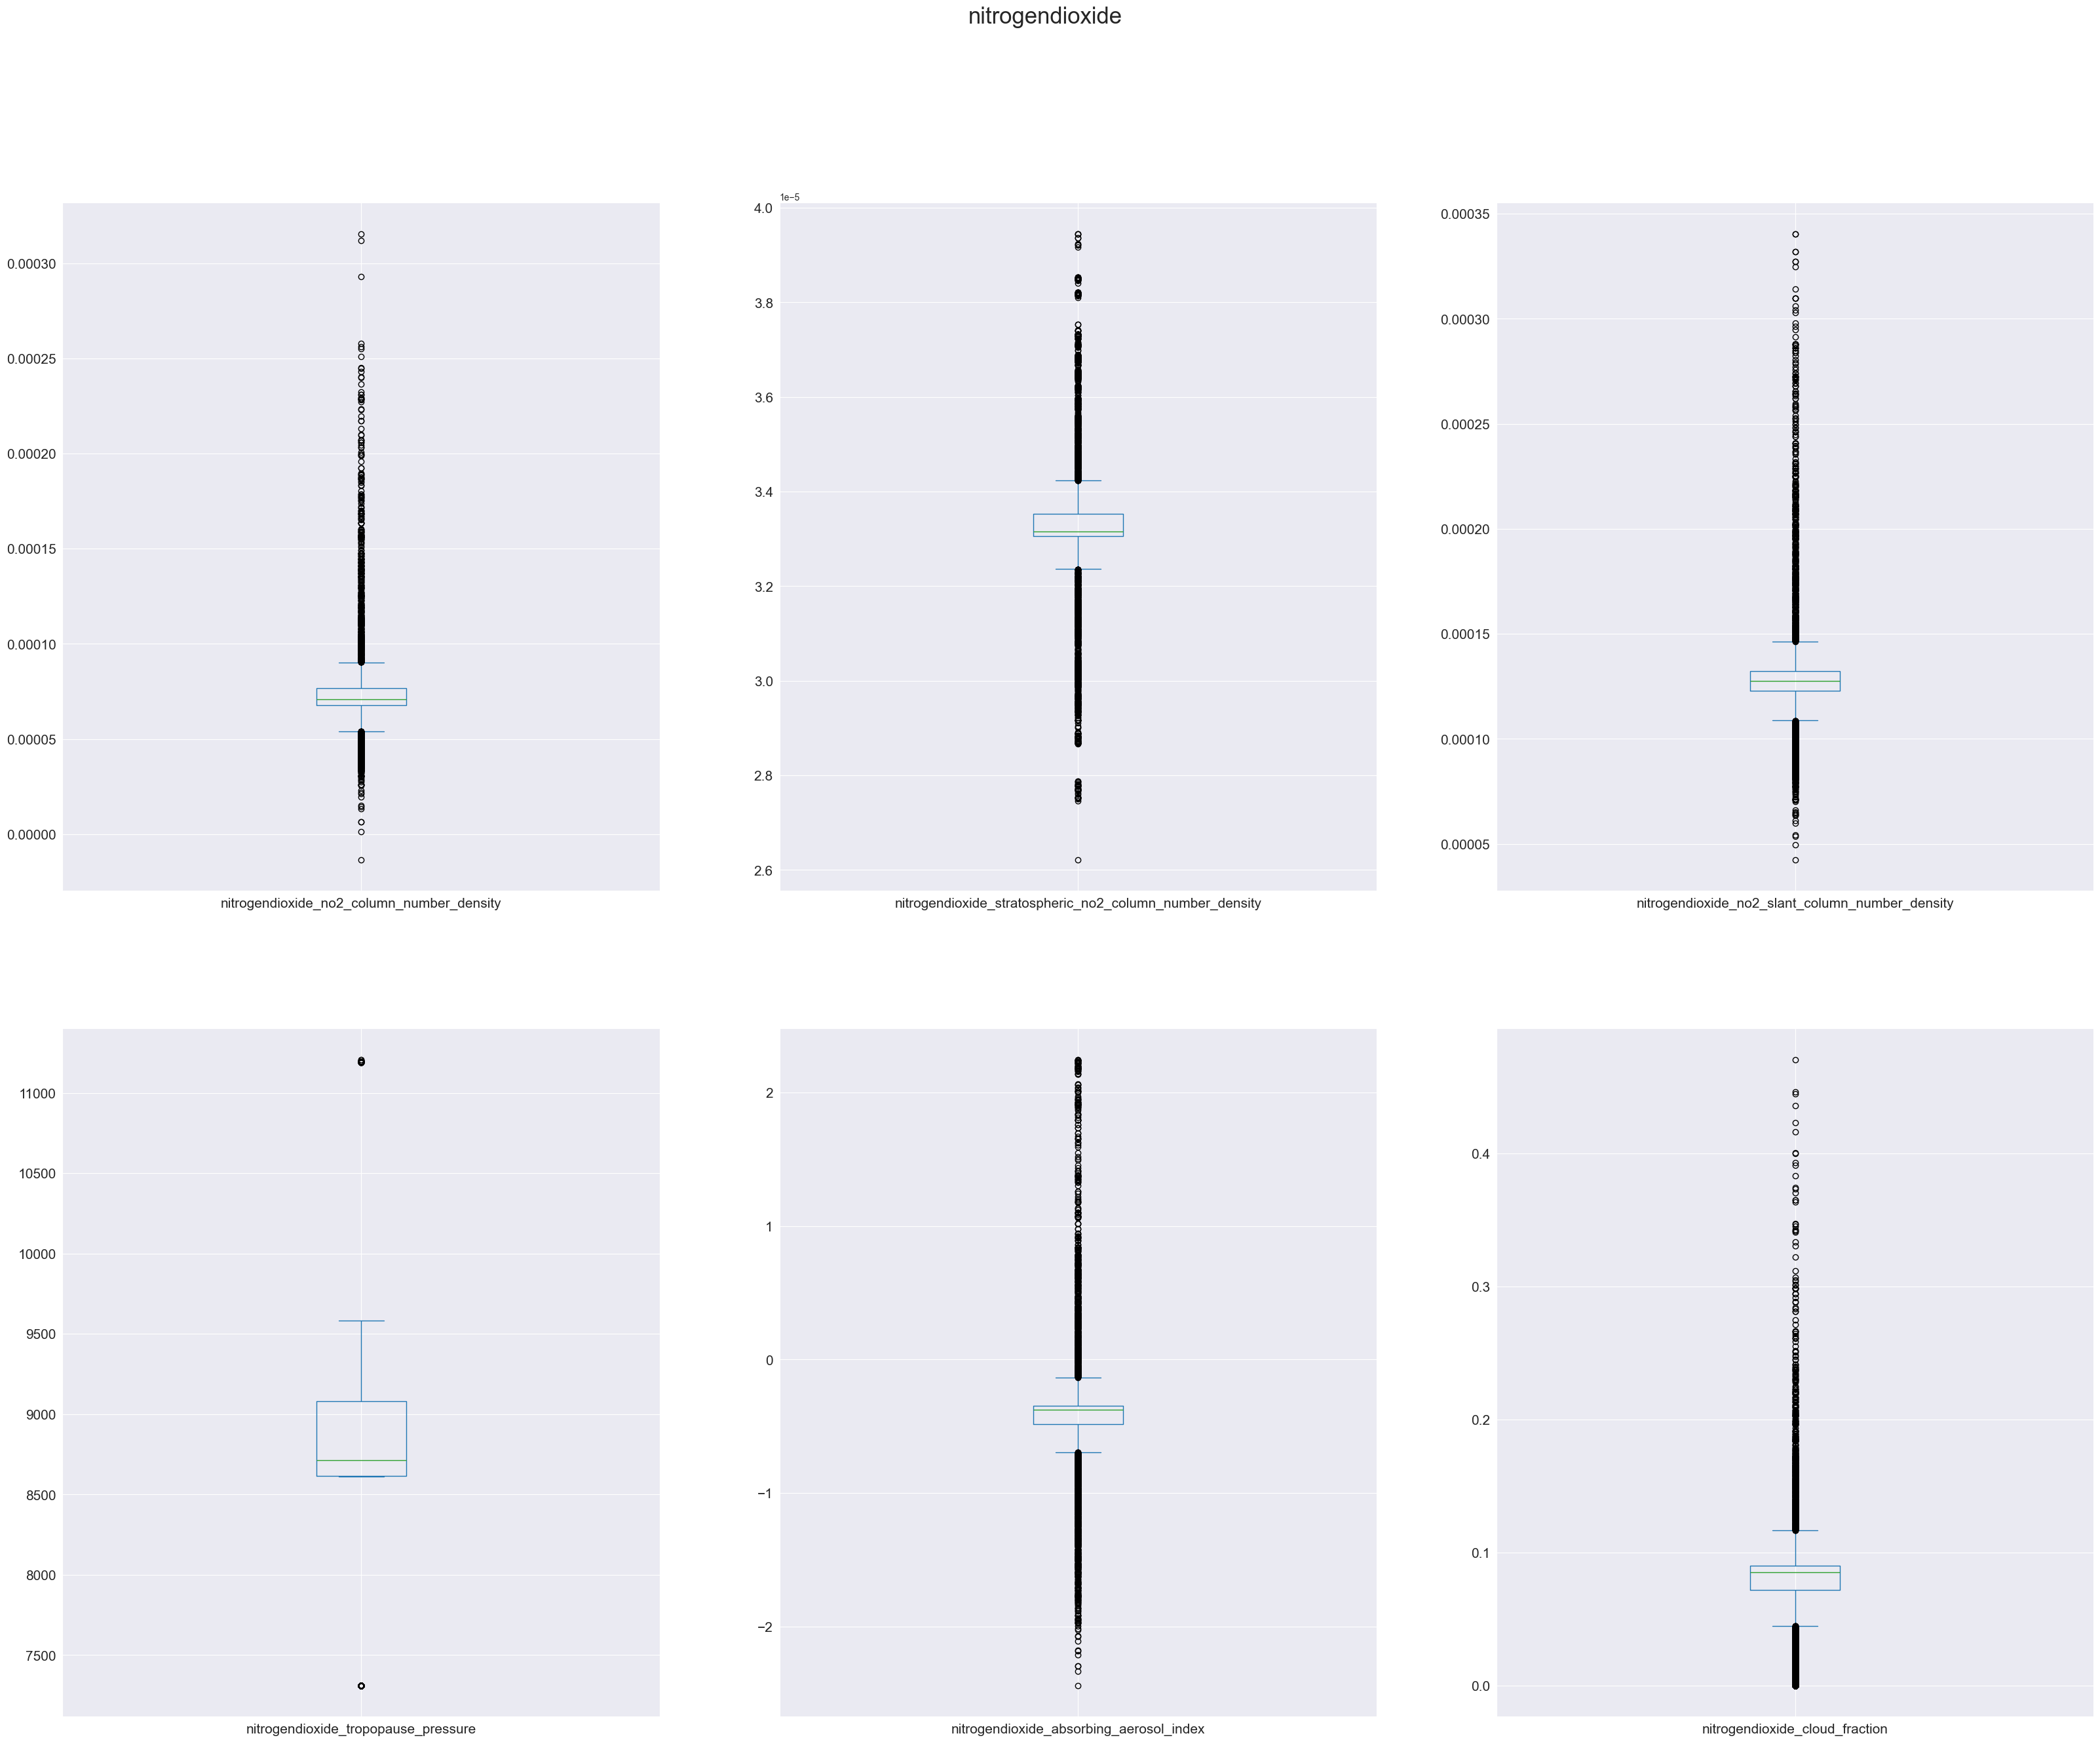

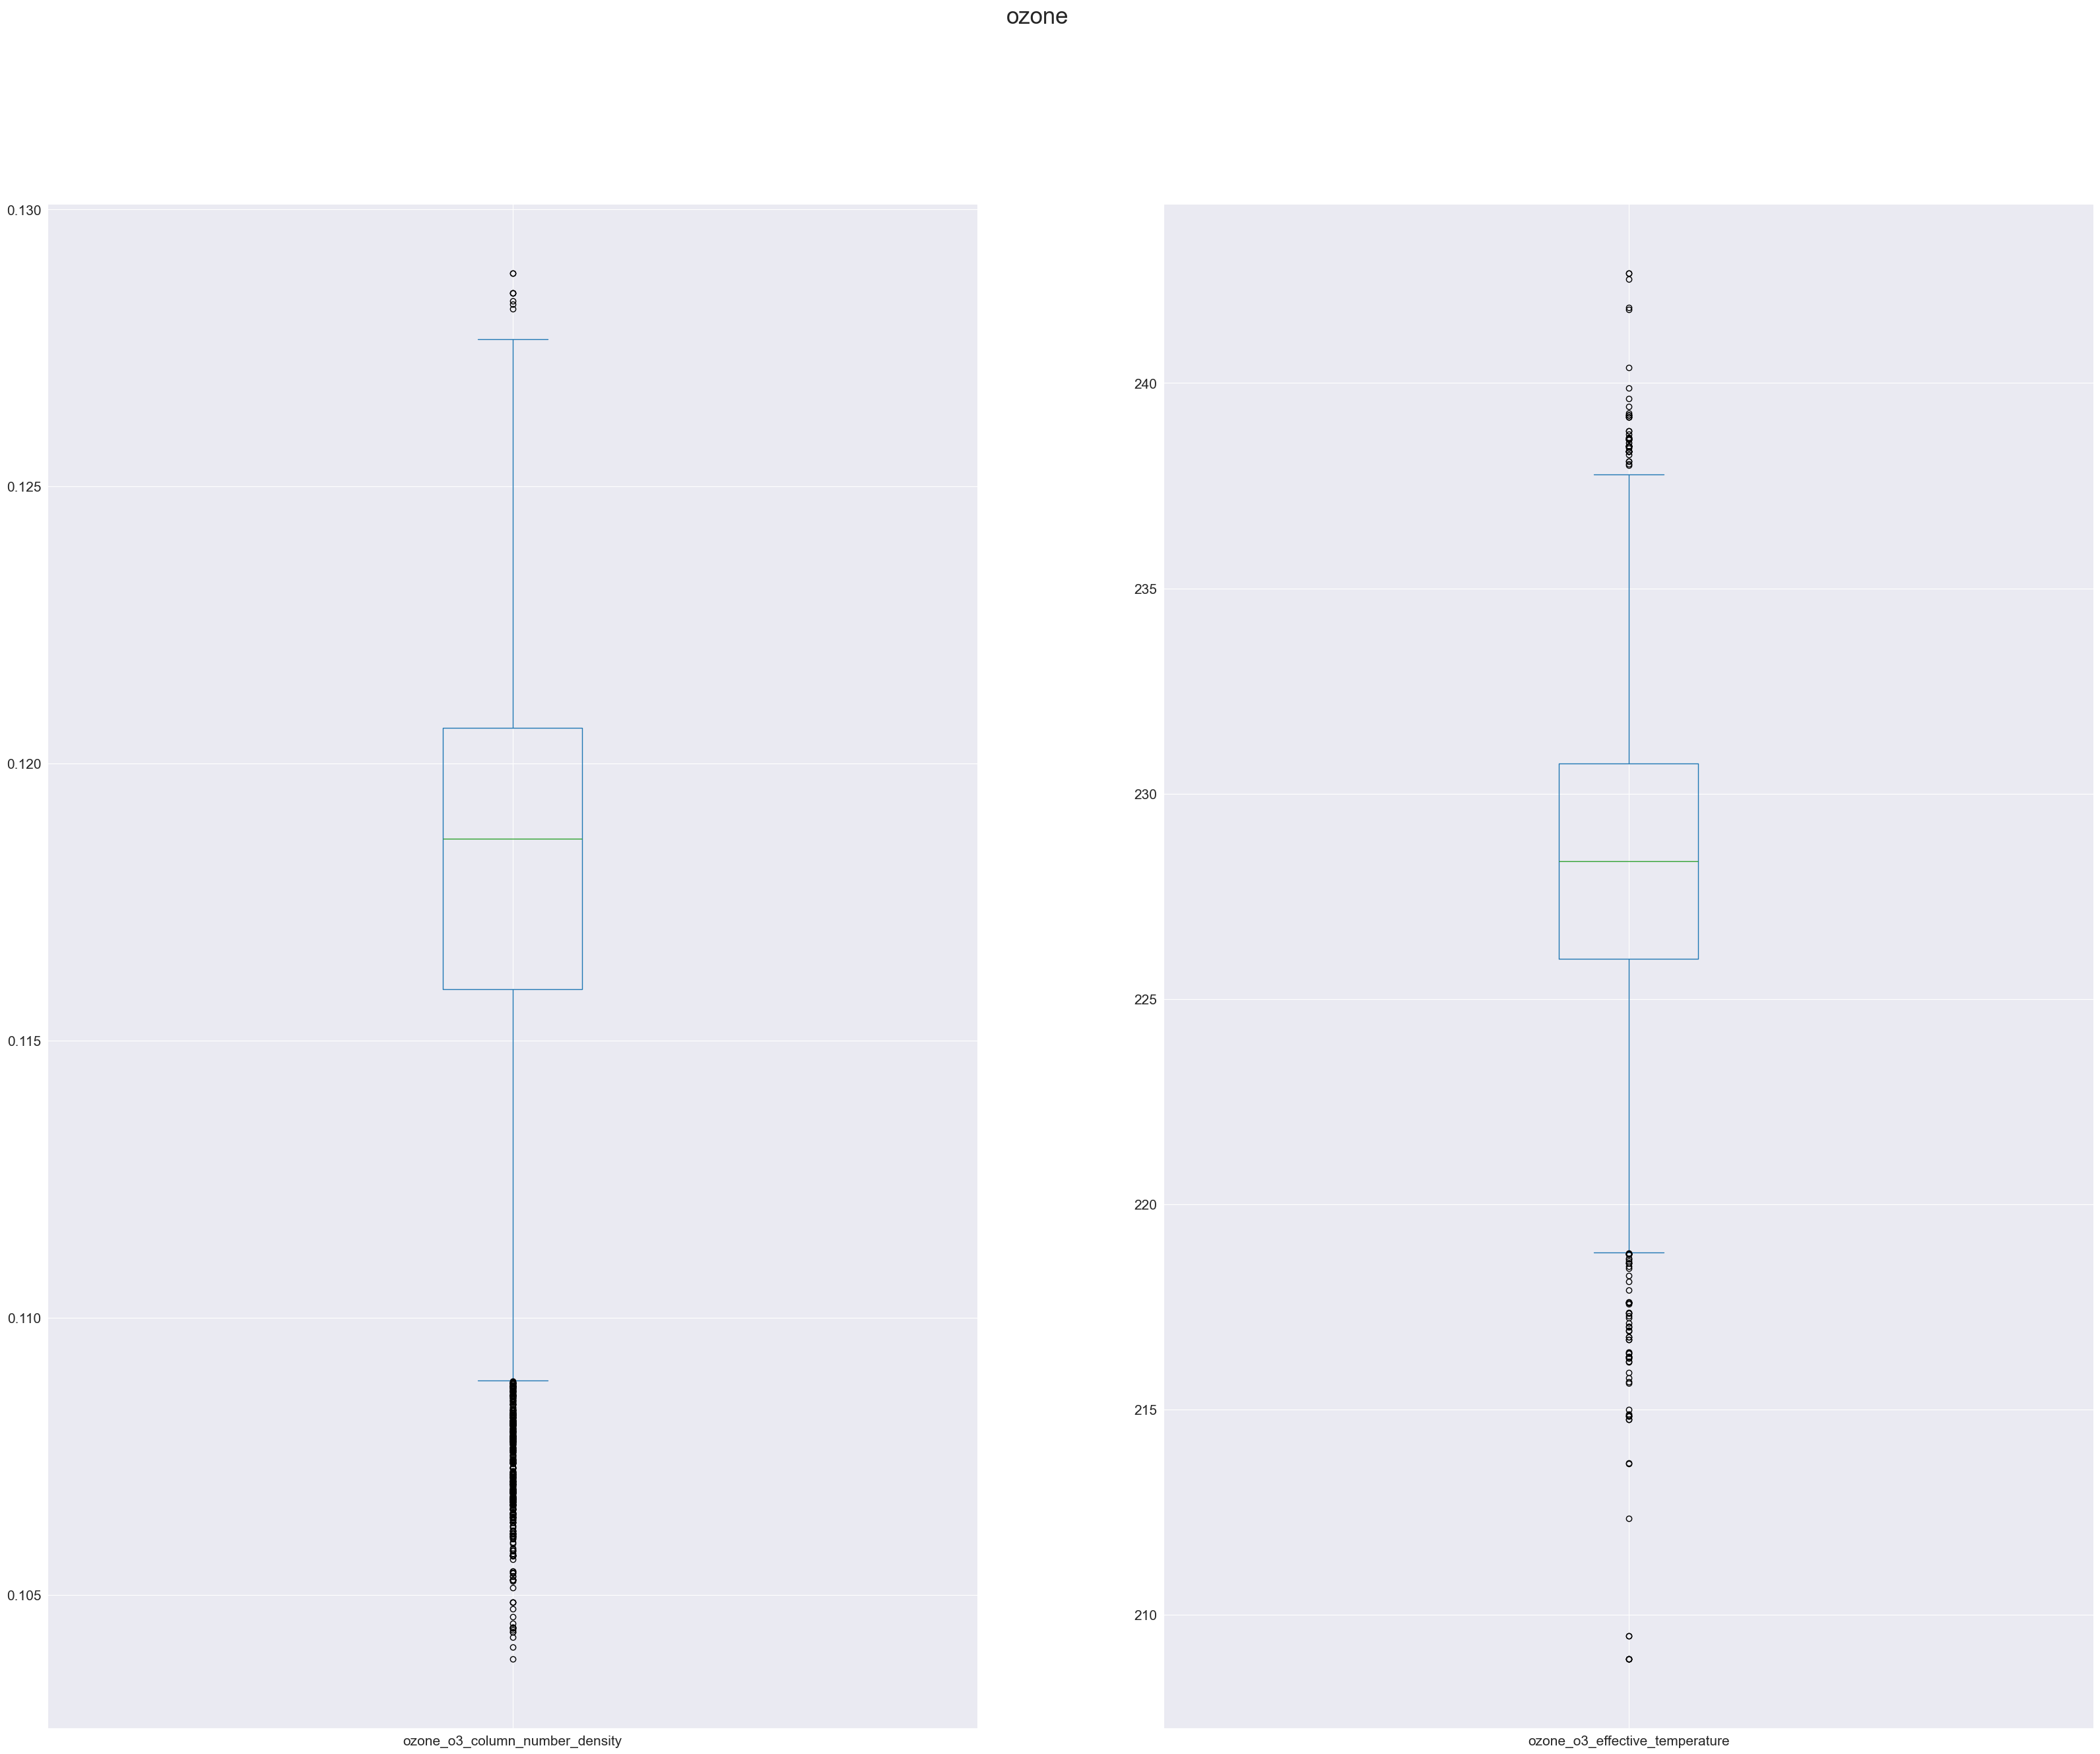

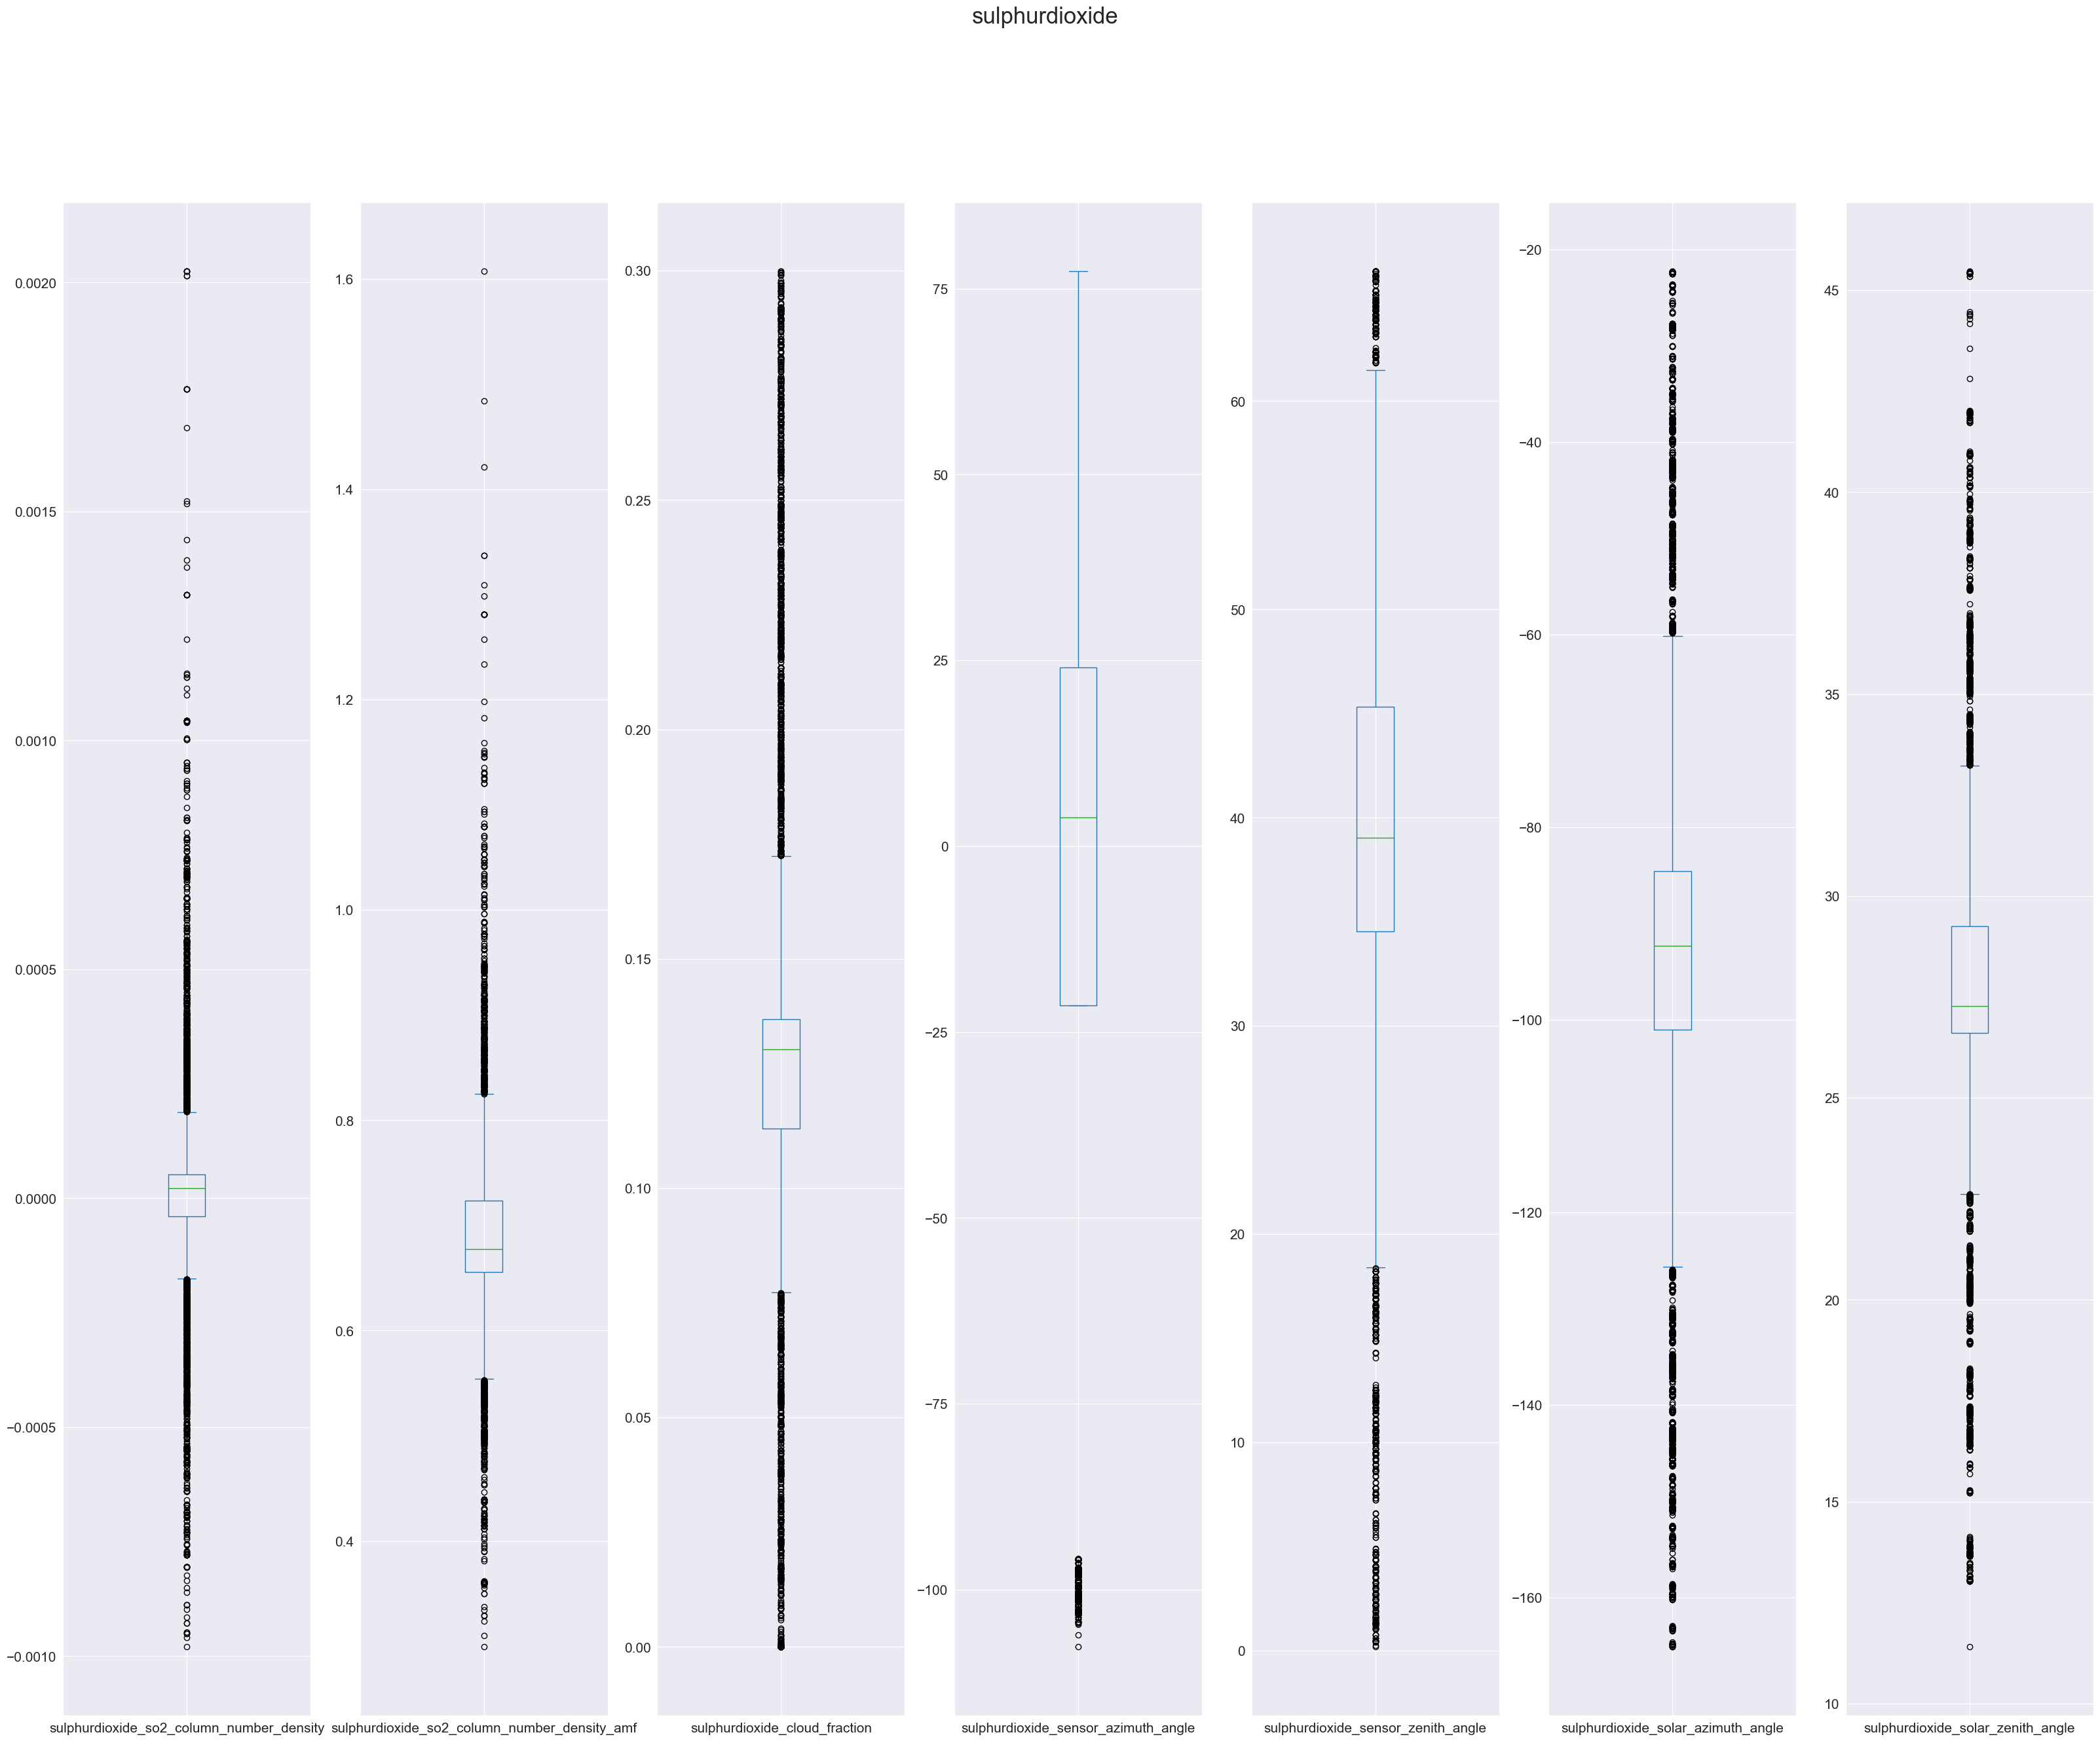

In [11]:
from sympy import divisors

def plot_boxplots():
    for index, column_group in enumerate(starts_with):
        similar_columns = [col for col in data.columns if col.startswith(column_group)]
        if len(similar_columns) > 1:
            divs = divisors(len(similar_columns))
            if len(divs) % 2 == 0:
                rows, cols = divs[(len(divs) // 2) - 1], divs[len(divs) // 2]
            else:
                rows, cols = divs[len(divs) // 2], divs[len(divs) // 2]
            fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(40, 30), squeeze=False)
            fig.suptitle(column_group, fontsize=25)
            for j, column in enumerate(similar_columns):
                x_cord, y_cord = divmod(j, cols)
                data[column].plot(kind='box', ax=ax[x_cord][y_cord], fontsize=15)
            plt.show()


plot_boxplots()

### 2. Usunięcie wartości odstających

In [12]:
from scipy.stats import zscore

def del_outliers(dataframe):
    vertical_columns = ['sulphurdioxide_so2_column_number_density', 'carbonmonoxide_co_column_number_density', 'nitrogendioxide_no2_column_number_density', 'nitrogendioxide_stratospheric_no2_column_number_density']
    for index, column in enumerate(vertical_columns):
        vec, indexes = zscore(dataframe[column]), []
        for j in range(len(vec)):
            if -5 <= vec[j] >= 5:
                indexes.append(j)
        dataframe.drop(index=indexes, inplace=True)
        dataframe.reset_index(drop=True, inplace=True)
    return dataframe


data = del_outliers(data)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7933 entries, 0 to 7932
Data columns (total 29 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   hour                                                      7933 non-null   int64  
 1   sulphurdioxide_so2_column_number_density                  7933 non-null   float64
 2   sulphurdioxide_so2_column_number_density_amf              7933 non-null   float64
 3   sulphurdioxide_cloud_fraction                             7933 non-null   float64
 4   sulphurdioxide_sensor_azimuth_angle                       7933 non-null   float64
 5   sulphurdioxide_sensor_zenith_angle                        7933 non-null   float64
 6   sulphurdioxide_solar_azimuth_angle                        7933 non-null   float64
 7   sulphurdioxide_solar_zenith_angle                         7933 non-null   float64
 8   month             

In [13]:
data.head()

,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,month,carbonmonoxide_co_column_number_density,...,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,ozone_o3_column_number_density,ozone_o3_effective_temperature,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_optical_depth,cloud_surface_albedo,pm2_5,day
0,13,-0.000039,0.723472,0.115874,-5.737662,39.331518,-84.576540,27.221305,10,0.034498,...,0.000179,1.069414,0.122055,230.693756,53927.564347,5762.553590,19.840423,0.254615,12.015000,2
1,12,-0.000002,0.675999,0.130326,0.086030,37.226248,-98.171594,28.170160,11,0.045475,...,0.000214,1.462390,0.116975,228.260193,52561.562695,6061.523141,20.837146,0.252481,42.267200,3
2,13,0.000019,0.725806,0.130194,12.857313,39.038506,-101.036287,26.602647,11,0.033941,...,0.000146,1.135090,0.117559,224.102463,45185.499590,6791.682888,11.816715,0.192757,39.450741,4
3,14,-0.000039,0.723472,0.115874,-5.737662,39.331518,-84.576540,27.221305,11,0.034498,...,0.000179,1.069414,0.118412,226.529633,53927.564347,5762.553590,19.840423,0.254615,10.537600,2
4,13,0.000267,0.774656,0.223403,-97.811241,49.513344,-126.064468,40.167336,11,0.049045,...,0.000100,1.298433,0.117899,226.368851,86197.531250,1451.050659,10.521009,0.153114,19.431731,3


## <center>Selekcja cech</center>

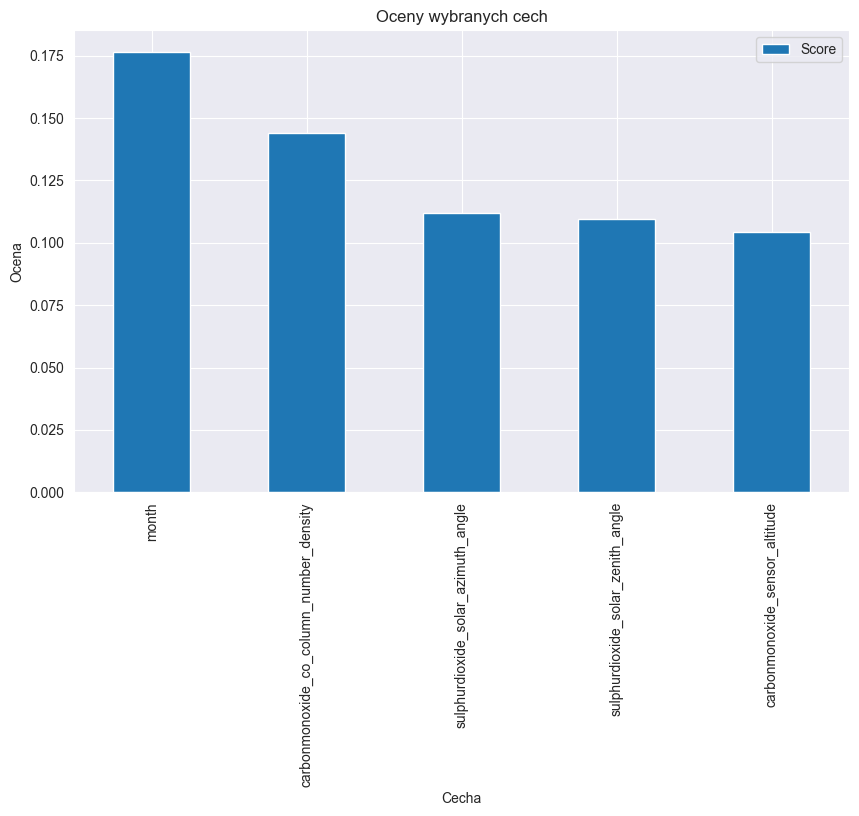

In [14]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

def select_best_features(not_fitted_X, not_fitted_y, num_of_features):
    sc = SelectKBest(score_func=mutual_info_regression, k=num_of_features)
    sc.fit(not_fitted_X, not_fitted_y)
    return sc

def plot_selection_scores(sc, num_of_features):
    scores = dict(zip(sc.feature_names_in_, sc.scores_))
    scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:num_of_features]
    scores_df = pd.DataFrame(scores, columns=['Feature', 'Score'])
    
    scores_df.plot(kind='bar', x='Feature', y='Score', figsize=(10, 6), rot=90, title='Oceny wybranych cech')
    plt.xlabel('Cecha')
    plt.ylabel('Ocena')


X, y = data.drop(['pm2_5'], axis=1), data['pm2_5']
k = 5
selector = select_best_features(X, y, k)
X, test = selector.transform(X), selector.transform(test)

plot_selection_scores(selector, k)

## <center>Transformacja danych</center>

### Potrzebne importy

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

### 1. Wybór sposobu preprocessingu danych

In [16]:
scaler = StandardScaler()

X = scaler.fit_transform(X, y)
test = scaler.transform(test)

### 2. Podział na zbiór testowy i treningowy

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

## <center>Część obliczeniowa</center>

### Potrzebne importy

In [18]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error

### Otrzymanie najlepszych parametrów

In [19]:
def give_the_best(clf):
    gs = GridSearchCV(clf, params, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=5)
    gs.fit(X_train, y_train)
    return gs.best_estimator_

def save_to_csv(y_pred, save_as):
    final_df = pd.concat([final_ids, pd.DataFrame.from_dict({'pm2_5': y_pred})], axis=1)
    final_df.to_csv(f'result\\{save_as}', index=False)

### <center>Regresja przy użyciu MLP</center>

In [20]:
# params = {
#     'hidden_layer_sizes': [(99, 141, 75)],
#     'activation': ['relu'],
#     'solver': ['adam'],
#     'max_iter': [1000],
#     'alpha': np.linspace(0.0001, 0.001, 10),
#     'batch_size': [64, 128, 256],
#     'learning_rate_init': np.linspace(0.001, 0.01, 10),
#     'warm_start': [True],
#     'early_stopping': [True],
#     'validation_fraction': [0.1]
# }
# 
# mlp = give_the_best(MLPRegressor())
# save_to_csv(mlp.predict(test), 'mlp.csv')
# print('Parametry MLP: ', mlp.get_params())
# print('RMSE: ', root_mean_squared_error(y_test, mlp.predict(X_test)))

### <center>PyTorch</center>

### Potrzebne importy

In [21]:
import torch
from torch import nn, optim

### 1. Wybór karty graficznej do nauki modelu

In [22]:
device = (
    'cuda'
    if torch.cuda.is_available()
    else 'mps'
    if torch.backends.mps.is_available()
    else 'cpu'
)

X_train_tensor = torch.tensor(X_train, device=device, dtype=torch.float)
X_test_tensor = torch.tensor(X_test, device=device, dtype=torch.float)
y_train_tensor = torch.tensor(y_train.to_numpy(), device=device, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.to_numpy(), device=device, dtype=torch.float)
test_tensor = torch.tensor(test, device=device, dtype=torch.float)

### 2. Architektura sieci neuronowej

In [23]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(X_train_tensor.shape[1], 102),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(102, 64),
            nn.ReLU(),
            nn.Dropout(p=0.1),
            nn.Linear(64, 1),
        )
        
    def forward(self, x):
        return self.layers(x)
    
def RMSELoss(y_true, y_pred):
    return torch.sqrt(torch.mean((y_true - y_pred) ** 2))


model = Net().to(device=device)
criterion = RMSELoss
optimizer = optim.Adam(
    model.parameters(), 
    lr=1e-3, 
    betas=(0.9, 0.999), 
    eps=1e-08, 
    weight_decay=1e-6,
    amsgrad=False, 
    fused=True
)

### 3. Nauka sieci neuronowej na zbiorze treningowym

In [24]:
from torch.utils.data import DataLoader


model.train()

batch_size = 16
num_epochs = 100

final_train_tensor = torch.concat((X_train_tensor, y_train_tensor.unsqueeze(dim=1)), dim=1)
dataset = DataLoader(final_train_tensor, batch_size=batch_size, shuffle=True)
epoch_losses = [{'epoch': i, 'rmse': 0} for i in range(num_epochs)]

for epoch in range(num_epochs):
    epoch_loss = 0
    for batch_idx, batch in enumerate(dataset):
        inputs, targets = batch[:, :-1], batch[:, -1]
        pred = model(inputs)
        optimizer.zero_grad()
        loss = criterion(targets, pred.squeeze())
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()
    epoch_losses[epoch].update({'rmse': epoch_loss / len(dataset)})
    print(f'Epoch [{epoch + 1}/{num_epochs}] RMSE: {epoch_loss / len(dataset):.4f}')

Epoch [1/100] RMSE: 19.7199
Epoch [2/100] RMSE: 16.9403
Epoch [3/100] RMSE: 16.5821
Epoch [4/100] RMSE: 16.9363
Epoch [5/100] RMSE: 16.6238
Epoch [6/100] RMSE: 16.6681
Epoch [7/100] RMSE: 16.7206
Epoch [8/100] RMSE: 16.5042
Epoch [9/100] RMSE: 16.5461
Epoch [10/100] RMSE: 16.5683
Epoch [11/100] RMSE: 16.5398
Epoch [12/100] RMSE: 16.4305
Epoch [13/100] RMSE: 16.5554
Epoch [14/100] RMSE: 16.3237
Epoch [15/100] RMSE: 16.3609
Epoch [16/100] RMSE: 16.2684
Epoch [17/100] RMSE: 16.2304
Epoch [18/100] RMSE: 16.3460
Epoch [19/100] RMSE: 16.5481
Epoch [20/100] RMSE: 16.3205
Epoch [21/100] RMSE: 16.3237
Epoch [22/100] RMSE: 16.2888
Epoch [23/100] RMSE: 16.2491
Epoch [24/100] RMSE: 16.2249
Epoch [25/100] RMSE: 16.2732
Epoch [26/100] RMSE: 16.1684
Epoch [27/100] RMSE: 16.3135
Epoch [28/100] RMSE: 16.2453
Epoch [29/100] RMSE: 16.1499
Epoch [30/100] RMSE: 16.2033
Epoch [31/100] RMSE: 16.1924
Epoch [32/100] RMSE: 16.0804
Epoch [33/100] RMSE: 16.1584
Epoch [34/100] RMSE: 16.2816
Epoch [35/100] RMSE: 16

### Jakość sieci neuronowej

<Axes: xlabel='epoch', ylabel='rmse'>

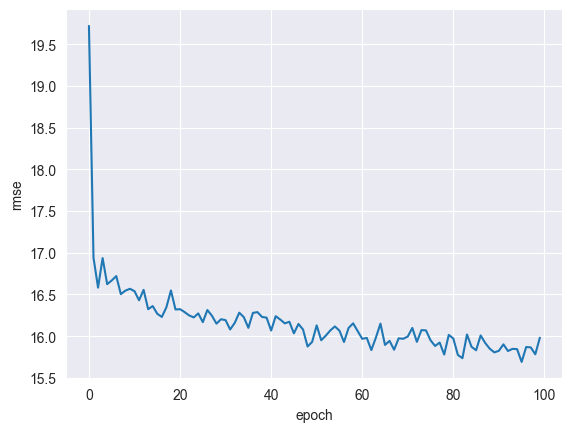

In [25]:
sns.lineplot(data=pd.DataFrame(epoch_losses), x='epoch', y='rmse')

### 4. Testowanie sieci neuronowej

In [26]:
model.eval()

with torch.no_grad():
    pred = model(X_test_tensor)
    loss = criterion(y_test_tensor, pred.squeeze())
    print(f'RMSE: {loss.item():.4f}')

RMSE: 25.2455


### Parametry modelu

In [27]:
print("Parametry modelu:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())
    
torch.save(model.state_dict(), 'model.pt')

Parametry modelu:
layers.0.weight 	 torch.Size([102, 5])
layers.0.bias 	 torch.Size([102])
layers.3.weight 	 torch.Size([64, 102])
layers.3.bias 	 torch.Size([64])
layers.6.weight 	 torch.Size([1, 64])
layers.6.bias 	 torch.Size([1])


## <center>Do wysłania</center>

In [28]:
with torch.no_grad():
    final_pred = model(test_tensor)
    save_to_csv(final_pred.squeeze().numpy(force=True), 'nn.csv')

### Dodatkowe informacje
<ol>
    <li>The 15km SO2 band is ingested only when solar_zenith_angle < 70.</li>
    <li>Because of noise on the data, negative vertical column values are often observed in particular over clean regions or for low SO2 emissions. It is recommended not to filter these values except for outliers, i.e. for vertical columns lower than -0.001 mol/m^2.</li>
</ol>